In [16]:
library(dplyr)

## Importing Data

In [17]:
db <- read.csv2("training.csv",sep=',',dec='.')

In [18]:
head(db)

,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,⋯,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,claim_amount
,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,PL000000,1,0.332,Med2,5,1,Monthly,No,WorkPrivate,M,⋯,aparvvfowrjncdhp,8,Gasoline,Tourism,174,11040,1143,1270,33.1,0
2,PL042495,1,0.000,Med2,6,1,Monthly,No,WorkPrivate,M,⋯,aparvvfowrjncdhp,10,Diesel,Tourism,174,11040,1143,1290,51.3,0
3,PL042496,1,0.196,Med1,2,1,Yearly,Yes,Retired,M,⋯,iwhqpdfuhrsxyqxe,8,Diesel,Commercial,150,14159,1193,1020,262.8,0
4,PL042497,1,0.000,Med2,8,5,Yearly,No,WorkPrivate,F,⋯,kvcddisqpkysmvvo,4,Gasoline,Tourism,149,17233,1012,180,219.7,0
5,PL042498,1,0.000,Med1,2,2,Yearly,No,Retired,F,⋯,tdgkjlphosocwbgu,13,Gasoline,Tourism,200,19422,1315,30,70.3,0
6,PL042501,1,0.000,Med2,8,2,Yearly,No,Retired,F,⋯,xaklvfxsplowrglp,16,Gasoline,Tourism,196,24750,1200,210,366.5,0


In [19]:
str(db)

'data.frame':	228216 obs. of  26 variables:
 $ id_policy             : chr  "PL000000" "PL042495" "PL042496" "PL042497" ...
 $ year                  : num  1 1 1 1 1 1 1 1 1 1 ...
 $ pol_no_claims_discount: num  0.332 0 0.196 0 0 0 0.018 0 0.087 0.584 ...
 $ pol_coverage          : chr  "Med2" "Med2" "Med1" "Med2" ...
 $ pol_duration          : int  5 6 2 8 2 8 1 4 1 6 ...
 $ pol_sit_duration      : int  1 1 1 5 2 2 1 2 1 3 ...
 $ pol_pay_freq          : chr  "Monthly" "Monthly" "Yearly" "Yearly" ...
 $ pol_payd              : chr  "No" "No" "Yes" "No" ...
 $ pol_usage             : chr  "WorkPrivate" "WorkPrivate" "Retired" "WorkPrivate" ...
 $ drv_sex1              : chr  "M" "M" "M" "F" ...
 $ drv_age1              : num  35 60 55 54 65 68 41 51 44 53 ...
 $ drv_age_lic1          : num  16 41 35 31 38 46 20 7 22 34 ...
 $ drv_drv2              : chr  "Yes" "No" "Yes" "No" ...
 $ drv_sex2              : chr  "F" "0" "F" "0" ...
 $ drv_age2              : num  26 NA 57 NA NA NA NA NA 

# Exploratory Analysis

In [20]:
dim(db)

[1] 228216     26

In [21]:
summary(db)

  id_policy              year      pol_no_claims_discount pol_coverage      
 Length:228216      Min.   :1.00   Min.   :0.00000        Length:228216     
 Class :character   1st Qu.:1.75   1st Qu.:0.00000        Class :character  
 Mode  :character   Median :2.50   Median :0.00000        Mode  :character  
                    Mean   :2.50   Mean   :0.04438                          
                    3rd Qu.:3.25   3rd Qu.:0.00000                          
                    Max.   :4.00   Max.   :1.00000                          
                                                                            
  pol_duration   pol_sit_duration pol_pay_freq         pol_payd        
 Min.   : 1.00   Min.   : 1.000   Length:228216      Length:228216     
 1st Qu.: 5.00   1st Qu.: 3.000   Class :character   Class :character  
 Median :11.00   Median : 4.000   Mode  :character   Mode  :character  
 Mean   :12.61   Mean   : 4.245                                        
 3rd Qu.:18.00   3rd Qu.

In [22]:
as.data.frame(colSums(is.na(db)))

,colSums(is.na(db))
,<dbl>
id_policy,0
year,0
pol_no_claims_discount,0
pol_coverage,0
pol_duration,0
pol_sit_duration,0
pol_pay_freq,0
pol_payd,0
pol_usage,0


In [23]:
as.data.frame(round(colSums(is.na(db))*100/nrow(db)))

,round(colSums(is.na(db)) * 100/nrow(db))
,<dbl>
id_policy,0
year,0
pol_no_claims_discount,0
pol_coverage,0
pol_duration,0
pol_sit_duration,0
pol_pay_freq,0
pol_payd,0
pol_usage,0


In [24]:
to_remove <- c("drv_sex2","drv_age2","drv_age_lic2","vh_make_model")

db <- db[names(db)[-which(names(db)%in%to_remove)]]

In [25]:
sum(is.na(db))

[1] 7660

In [26]:
install.packages("caret")
install.packages("ggplot2")
library(caret)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [27]:
imp <- preProcess(db, method = "medianImpute")
db <- predict(imp, db)

In [28]:
summary(db)

  id_policy              year      pol_no_claims_discount pol_coverage      
 Length:228216      Min.   :1.00   Min.   :0.00000        Length:228216     
 Class :character   1st Qu.:1.75   1st Qu.:0.00000        Class :character  
 Mode  :character   Median :2.50   Median :0.00000        Mode  :character  
                    Mean   :2.50   Mean   :0.04438                          
                    3rd Qu.:3.25   3rd Qu.:0.00000                          
                    Max.   :4.00   Max.   :1.00000                          
  pol_duration   pol_sit_duration pol_pay_freq         pol_payd        
 Min.   : 1.00   Min.   : 1.000   Length:228216      Length:228216     
 1st Qu.: 5.00   1st Qu.: 3.000   Class :character   Class :character  
 Median :11.00   Median : 4.000   Mode  :character   Mode  :character  
 Mean   :12.61   Mean   : 4.245                                        
 3rd Qu.:18.00   3rd Qu.: 5.000                                        
 Max.   :44.00   Max.   :26.0

In [29]:
names(db)

[1] "id_policy"              "year"                   "pol_no_claims_discount"
 [4] "pol_coverage"           "pol_duration"           "pol_sit_duration"      
 [7] "pol_pay_freq"           "pol_payd"               "pol_usage"             
[10] "drv_sex1"               "drv_age1"               "drv_age_lic1"          
[13] "drv_drv2"               "vh_age"                 "vh_fuel"               
[16] "vh_type"                "vh_speed"               "vh_value"              
[19] "vh_weight"              "population"             "town_surface_area"     
[22] "claim_amount"

## Categorial variables

In [30]:
cat_features <- c("pol_coverage","pol_pay_freq","pol_payd","pol_usage","drv_sex1","drv_drv2","vh_fuel","vh_type")

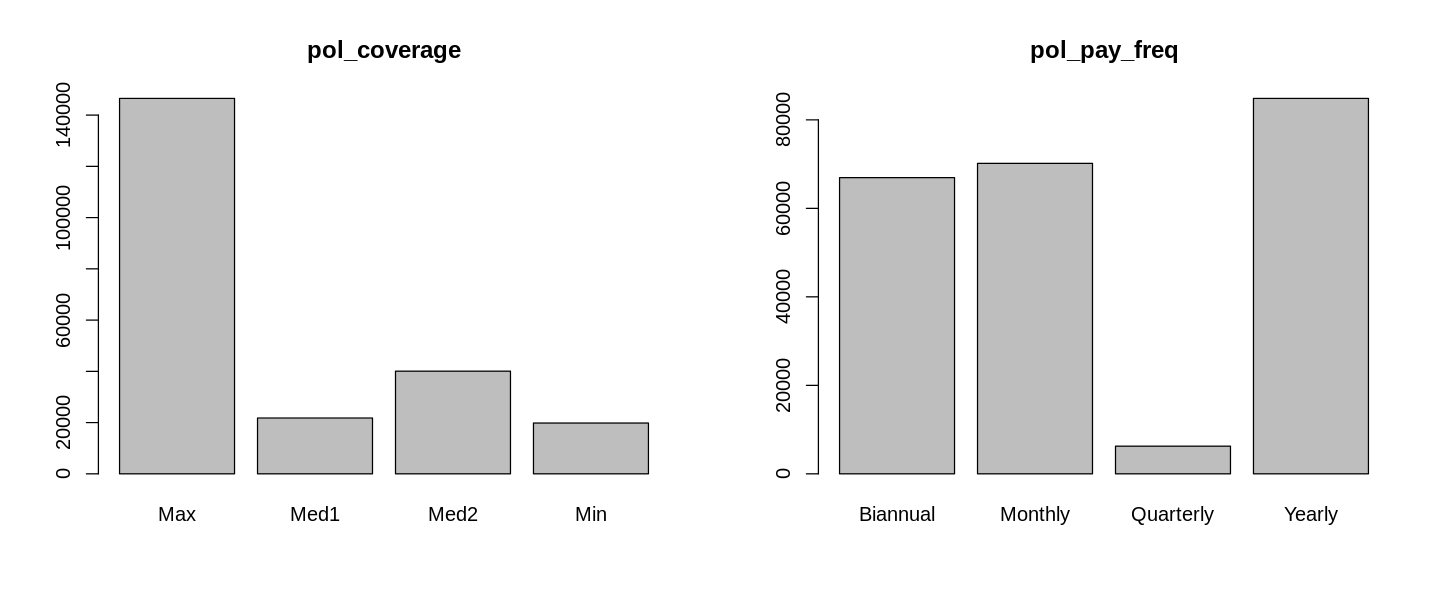

In [31]:
options(repr.plot.width=12, repr.plot.height=5)
par(mfrow=c(1,2))
barplot(table(db$pol_coverage),main="pol_coverage")
barplot(table(db$pol_pay_freq),main="pol_pay_freq")

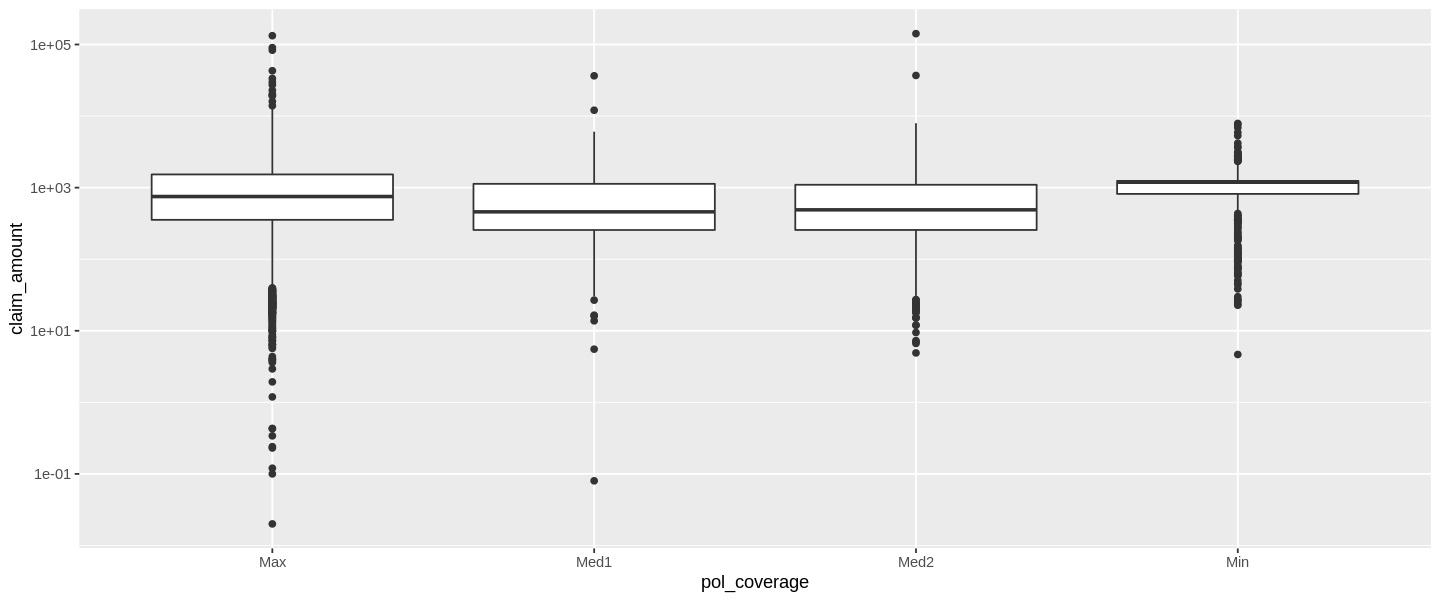

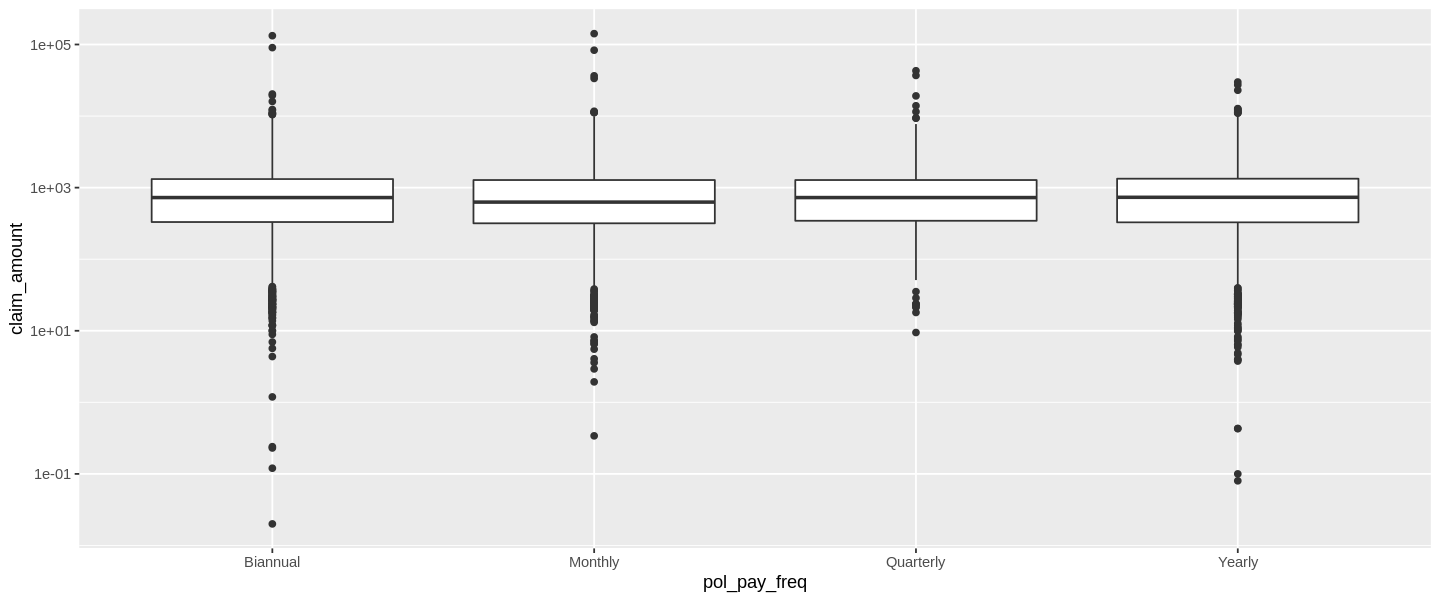

In [32]:
ggplot(db[db$claim_amount>0,],aes(pol_coverage,claim_amount)) + geom_boxplot()+scale_y_log10() 
ggplot(db[db$claim_amount>0,],aes(pol_pay_freq,claim_amount)) + geom_boxplot()+scale_y_log10()


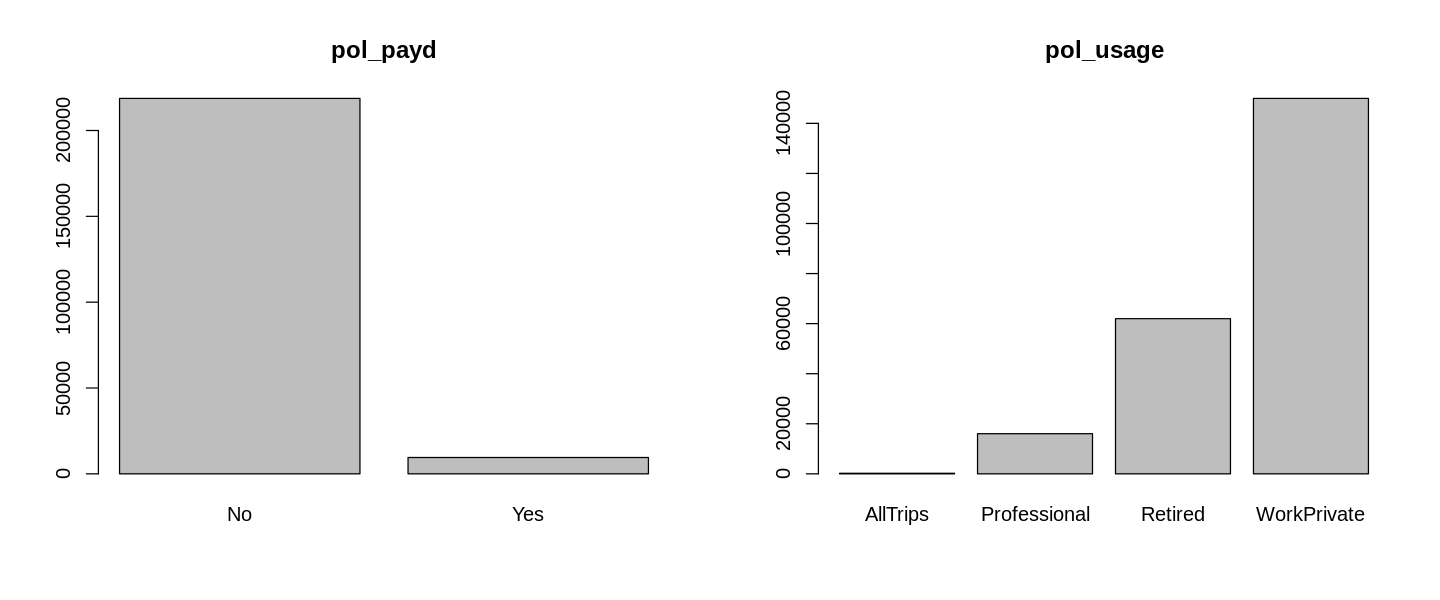

In [34]:
options(repr.plot.width=12, repr.plot.height=5)
par(mfrow=c(1,2))
barplot(table(db$pol_payd),main="pol_payd")
barplot(table(db$pol_usage),main="pol_usage")

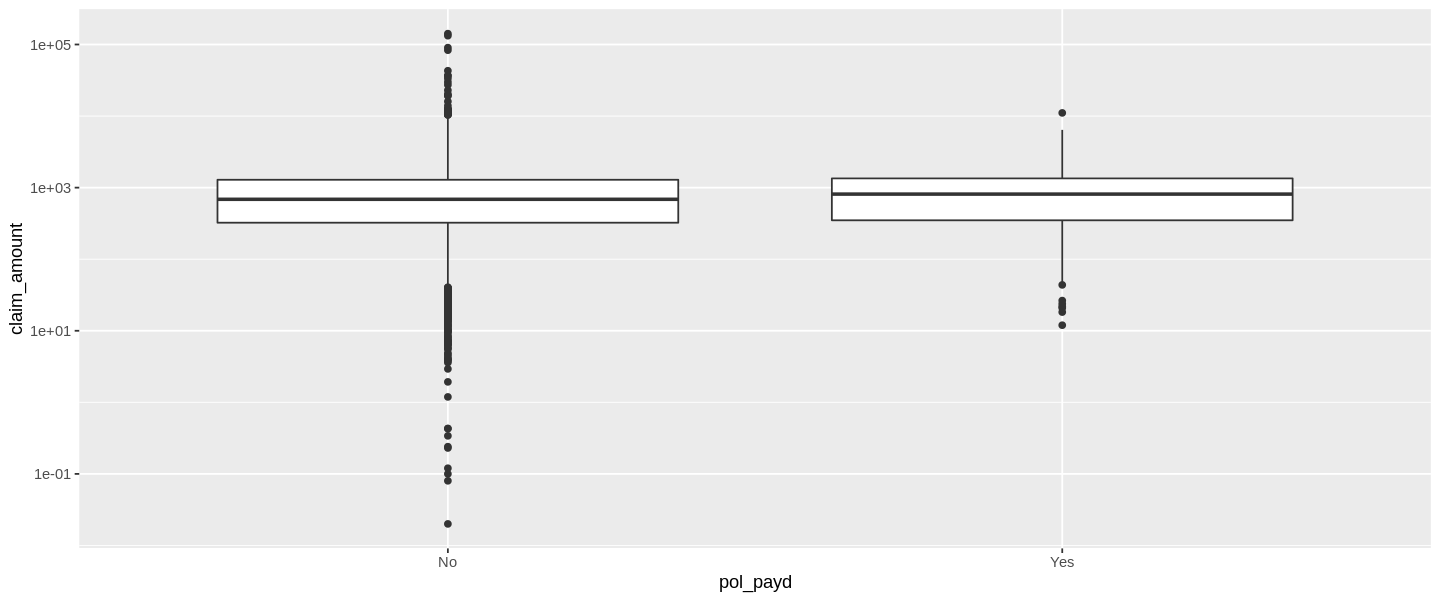

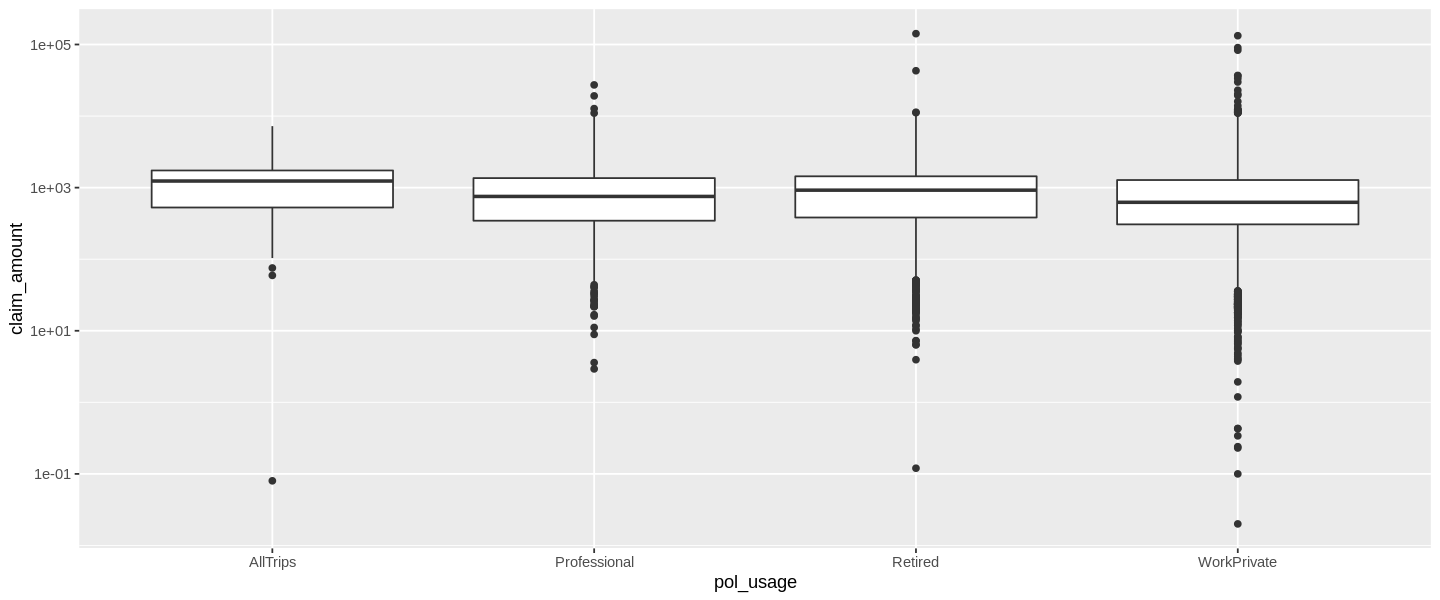

In [35]:
ggplot(db[db$claim_amount>0,],aes(pol_payd,claim_amount)) + geom_boxplot()+scale_y_log10() 
ggplot(db[db$claim_amount>0,],aes(pol_usage,claim_amount)) + geom_boxplot()+scale_y_log10()

In [36]:
db <- db %>% mutate(
    pol_usage_rm=as.factor(ifelse(vh_fuel=="AllTrips","Professional",as.character(pol_usage)))
)  

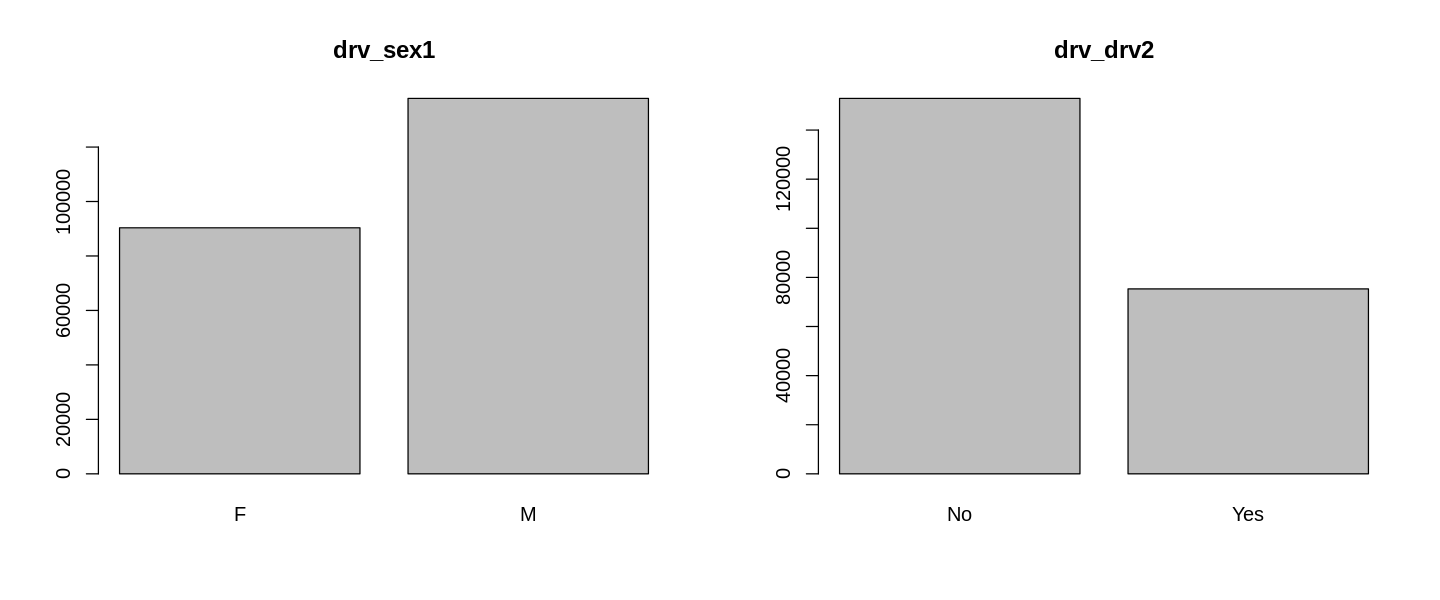

In [38]:
options(repr.plot.width=12, repr.plot.height=5)
par(mfrow=c(1,2))
barplot(table(db$drv_sex1),main="drv_sex1")
barplot(table(db$drv_drv2),main="drv_drv2")

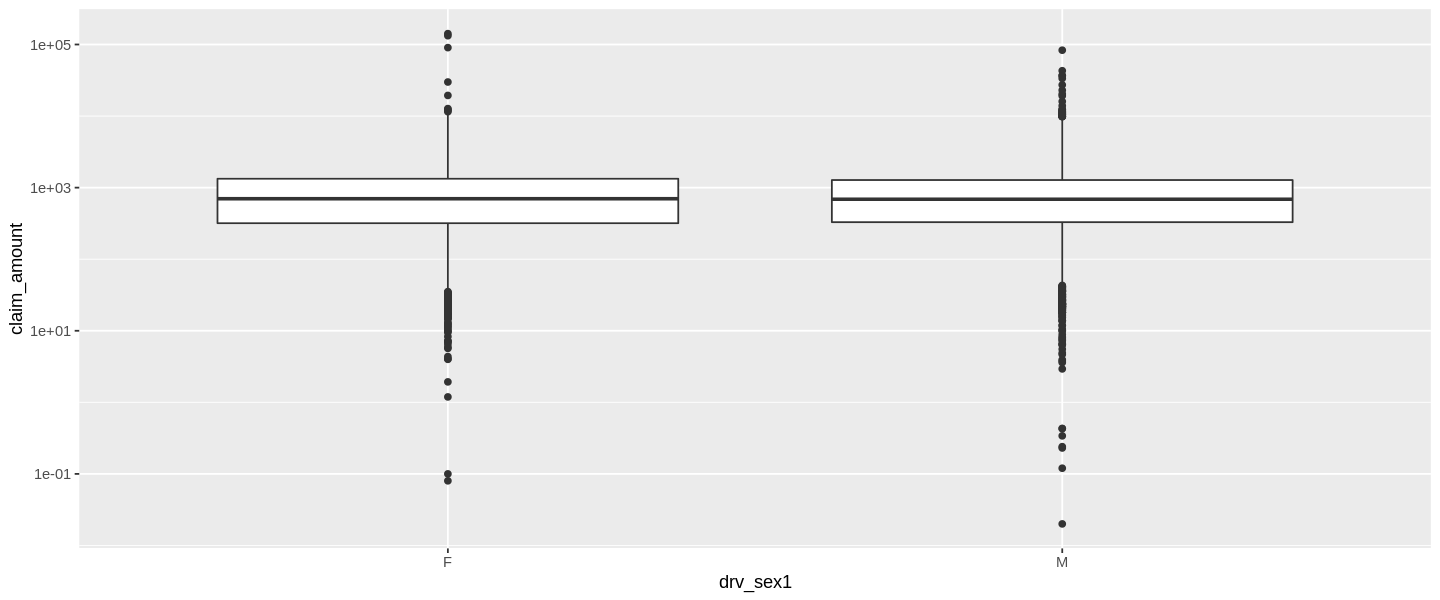

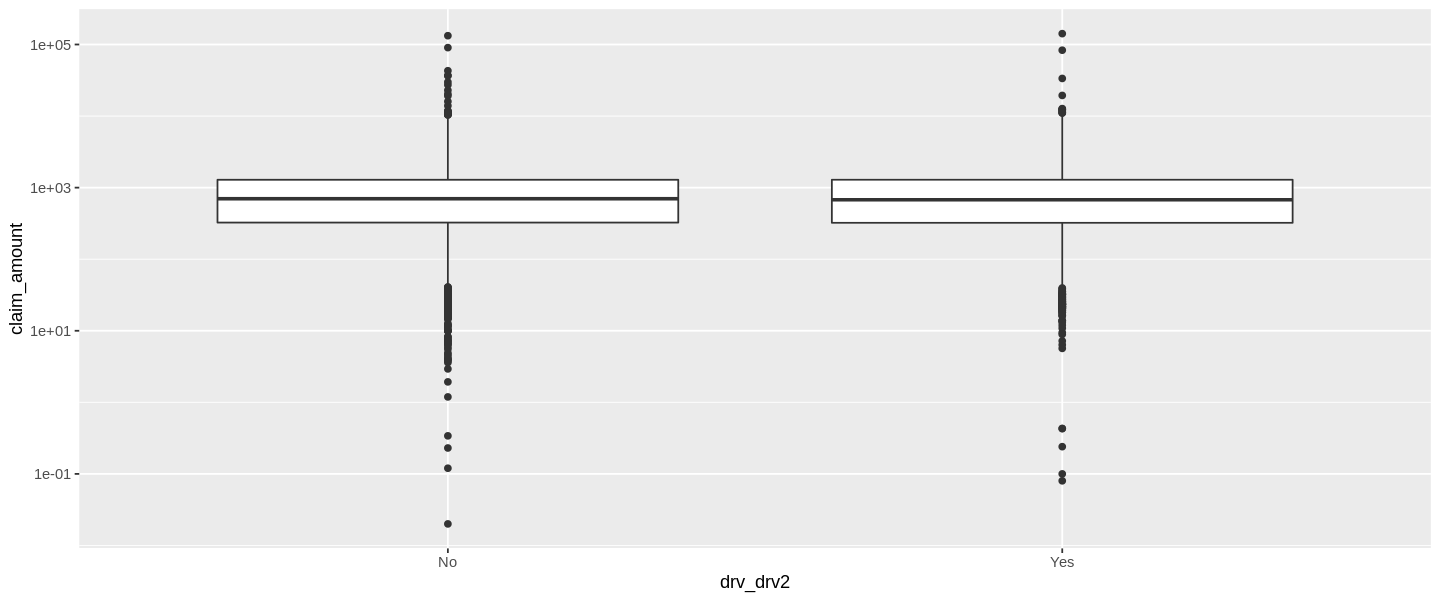

In [39]:
ggplot(db[db$claim_amount>0,],aes(drv_sex1,claim_amount)) + geom_boxplot()+scale_y_log10() 
ggplot(db[db$claim_amount>0,],aes(drv_drv2,claim_amount)) + geom_boxplot()+scale_y_log10()

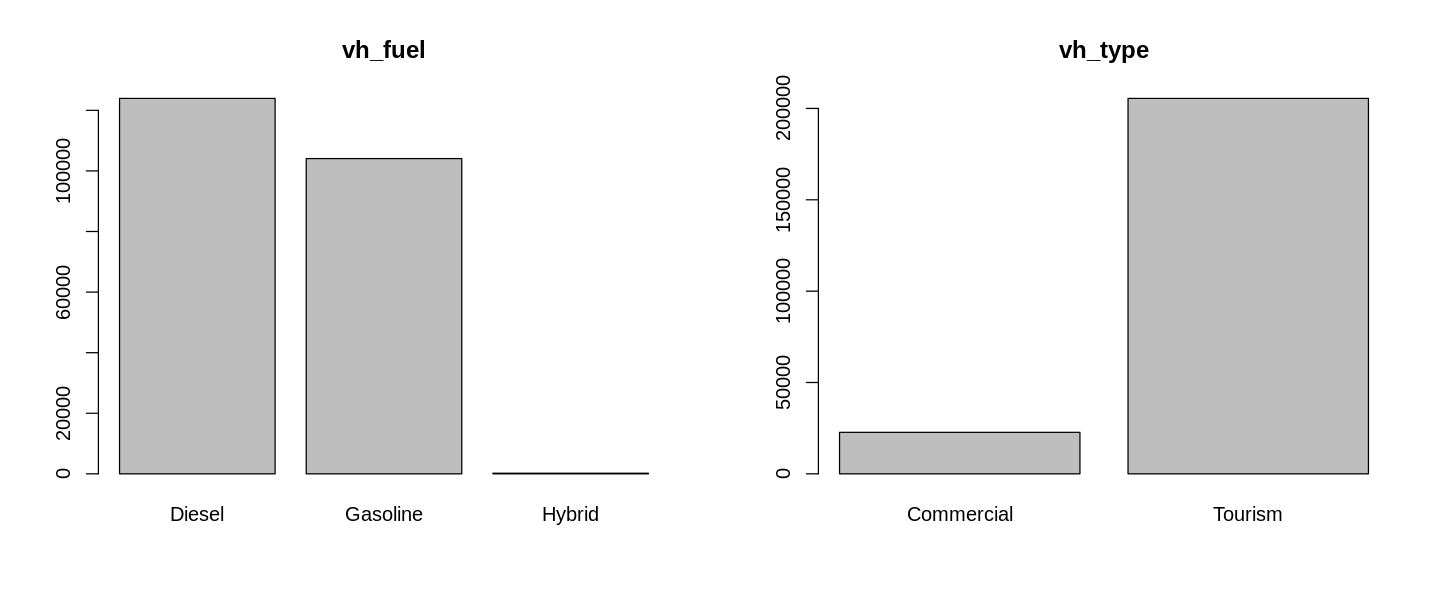

In [41]:
options(repr.plot.width=12, repr.plot.height=5)
par(mfrow=c(1,2))              
barplot(table(db$vh_fuel),main="vh_fuel")
barplot(table(db$vh_type ),main="vh_type")

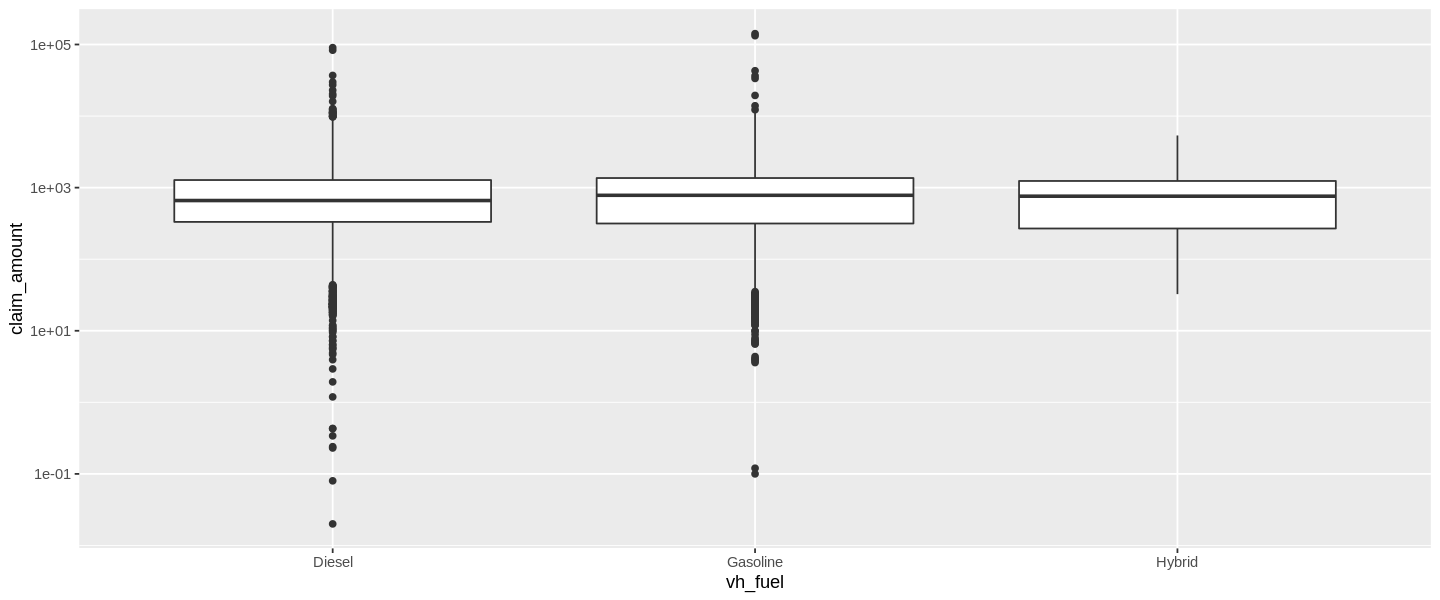

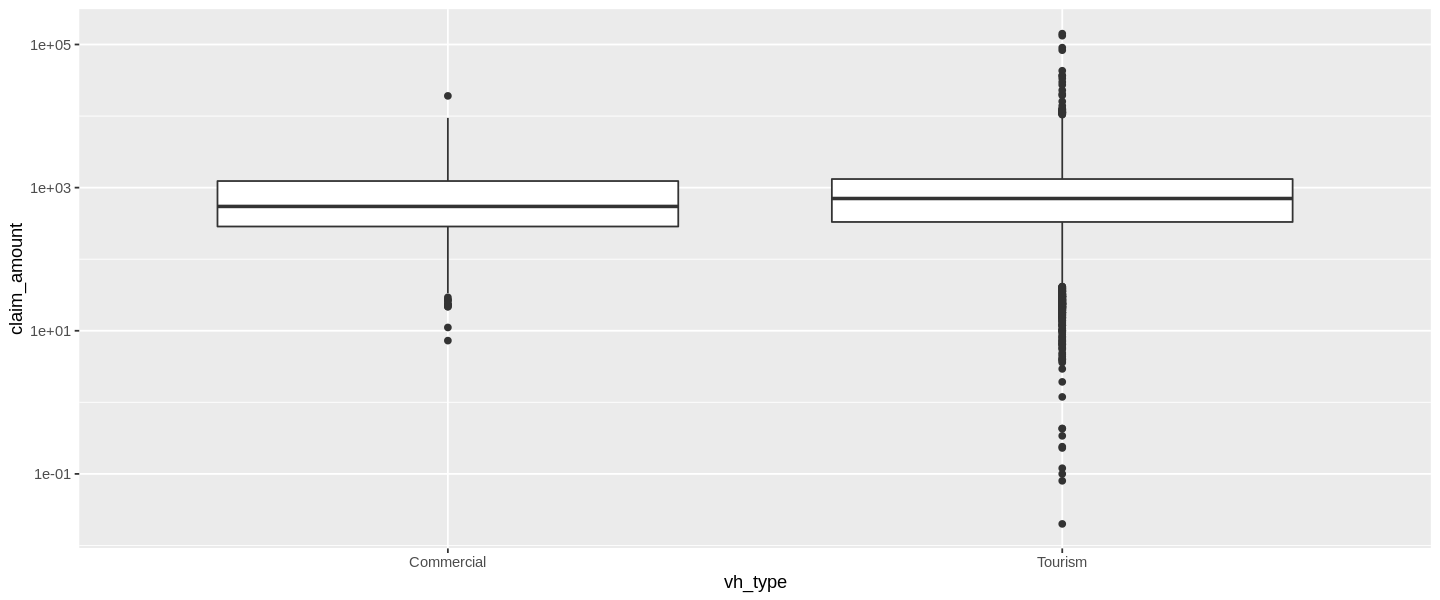

In [42]:
ggplot(db[db$claim_amount>0,],aes(vh_fuel,claim_amount)) + geom_boxplot()+scale_y_log10() 
ggplot(db[db$claim_amount>0,],aes(vh_type,claim_amount)) + geom_boxplot()+scale_y_log10()

## Continuous Variables

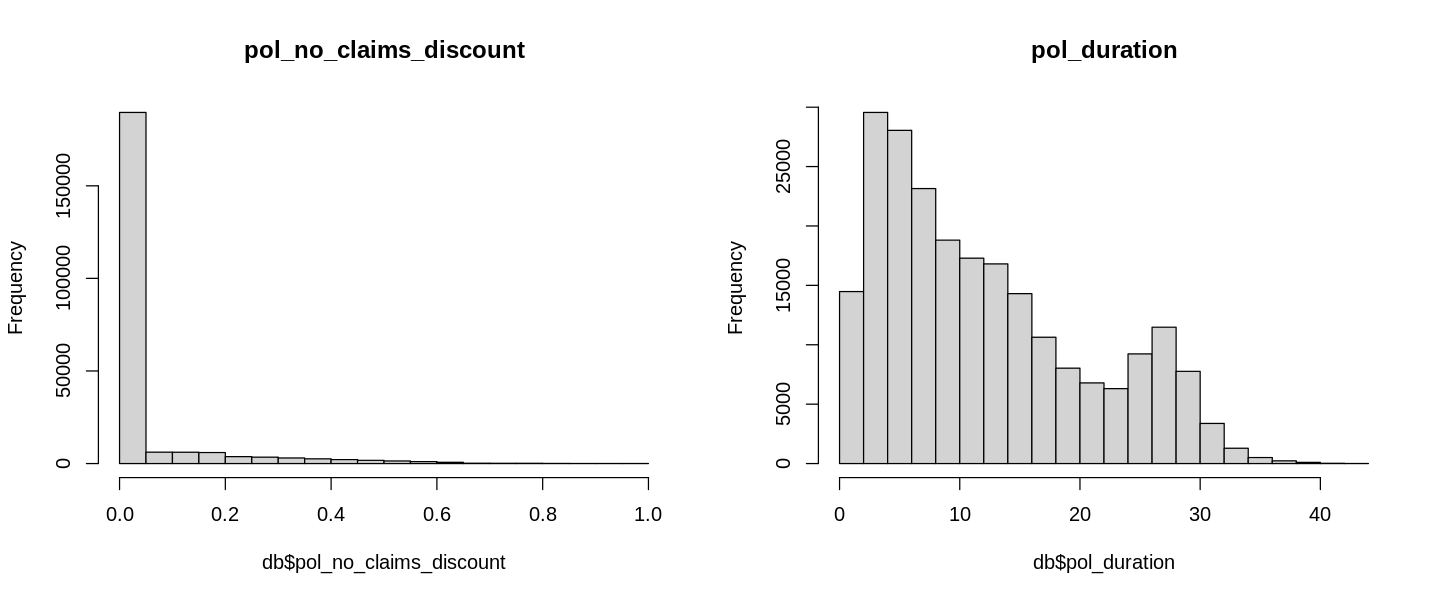

In [45]:
options(repr.plot.width=12, repr.plot.height=5)
par(mfrow=c(1,2))              
hist(db$pol_no_claims_discount,main="pol_no_claims_discount")
hist(db$pol_duration,main="pol_duration")

In [46]:
table(db$pol_duration)


    1     2     3     4     5     6     7     8     9    10    11    12    13 
 4998  9481 13192 16366 14740 13311 12095 11055  9877  8932  8582  8707  8516 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
 8294  7633  6670  5776  4858  4259  3771  3484  3305  3181  3128  3999  5233 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
 5675  5804  4702  3061  2061  1318   809   480   315   192   138    93    58 
   40    41    42    43    44 
   42    15     6     3     1 

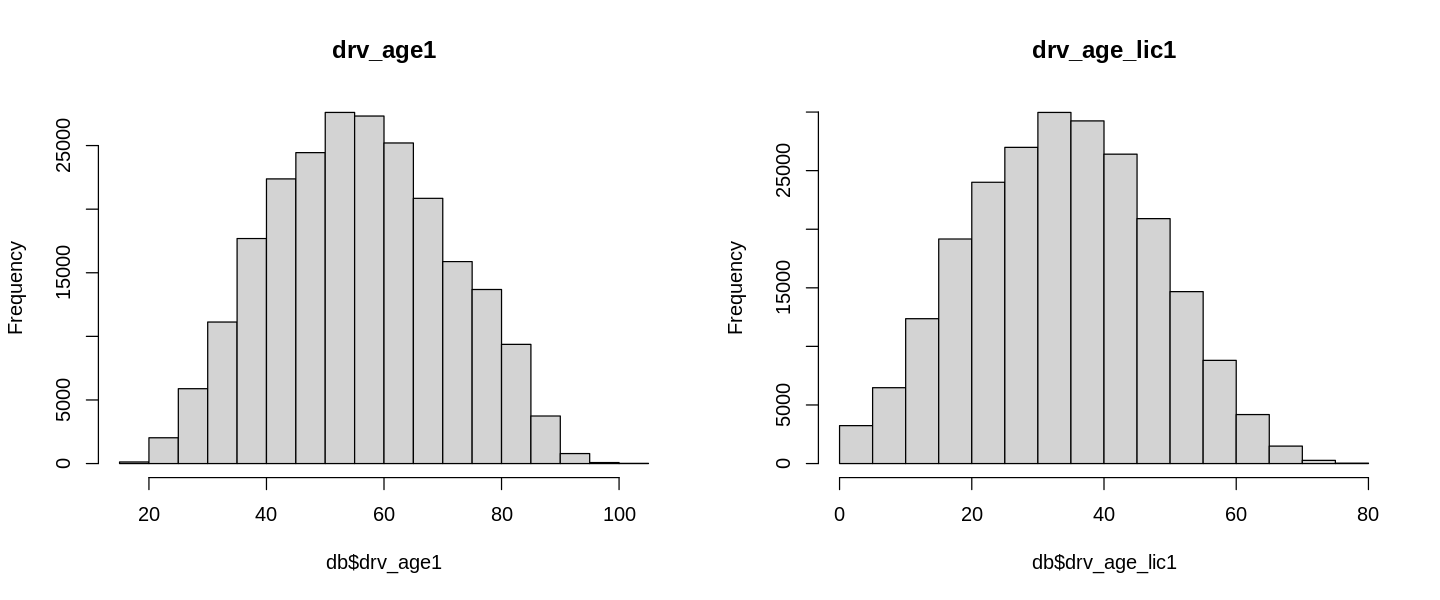

In [47]:
options(repr.plot.width=12, repr.plot.height=5)
par(mfrow=c(1,2))             
hist(db$drv_age1,main="drv_age1")
hist(db$drv_age_lic1,main="drv_age_lic1")

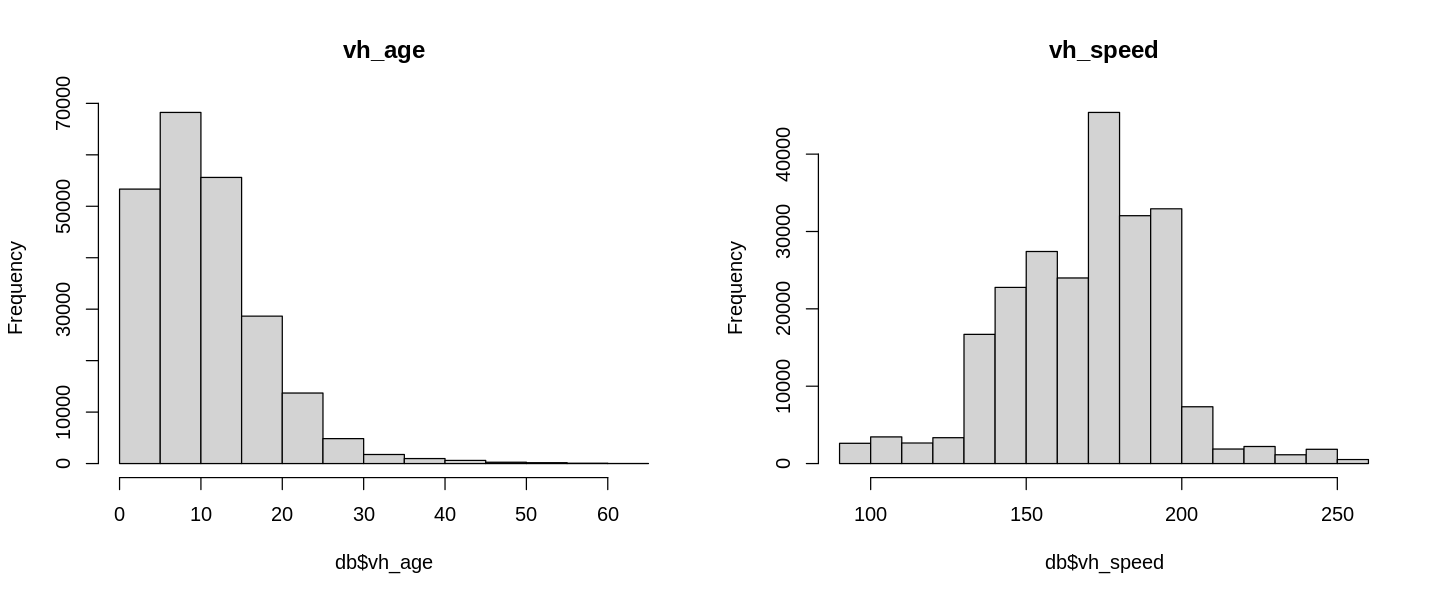

In [48]:
options(repr.plot.width=12, repr.plot.height=5)
par(mfrow=c(1,2))             
hist(db$vh_age,main="vh_age")
hist(db$vh_speed,main="vh_speed")

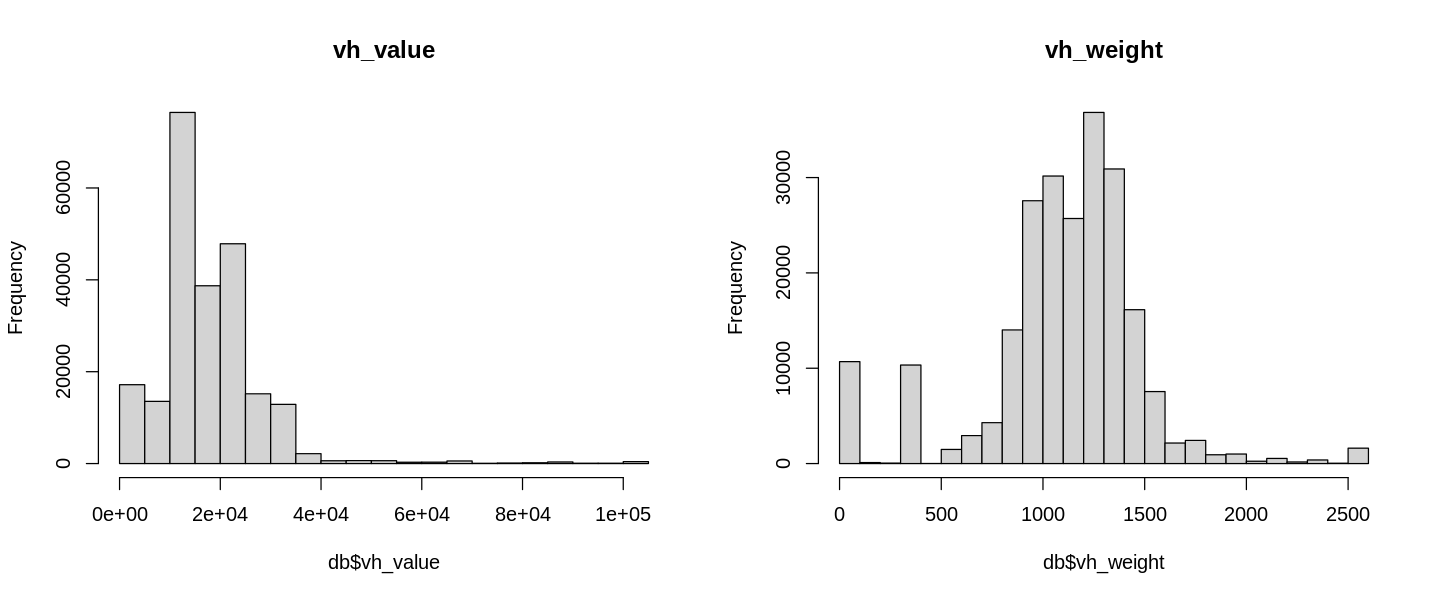

In [49]:
options(repr.plot.width=12, repr.plot.height=5)
par(mfrow=c(1,2))             
hist(db$vh_value,main="vh_value")
hist(db$vh_weight,main="vh_weight")

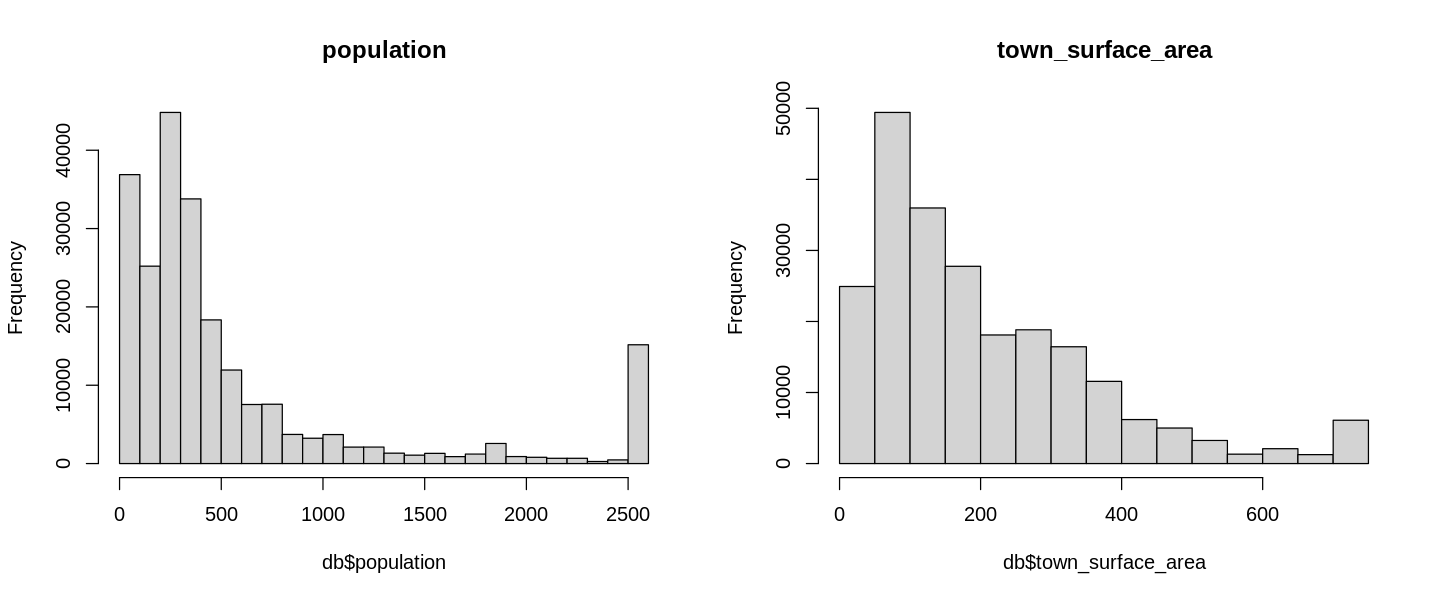

In [50]:
options(repr.plot.width=12, repr.plot.height=5)
par(mfrow=c(1,2))             
hist(db$population,main="population")
hist(db$town_surface_area,main="town_surface_area")

In [51]:
install.packages("corrplot")
library("corrplot")
con_features <- c("claim_amount", "pol_no_claims_discount","drv_age1","drv_age_lic1",
                 "vh_age","vh_speed","population","town_surface_area")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.84 loaded



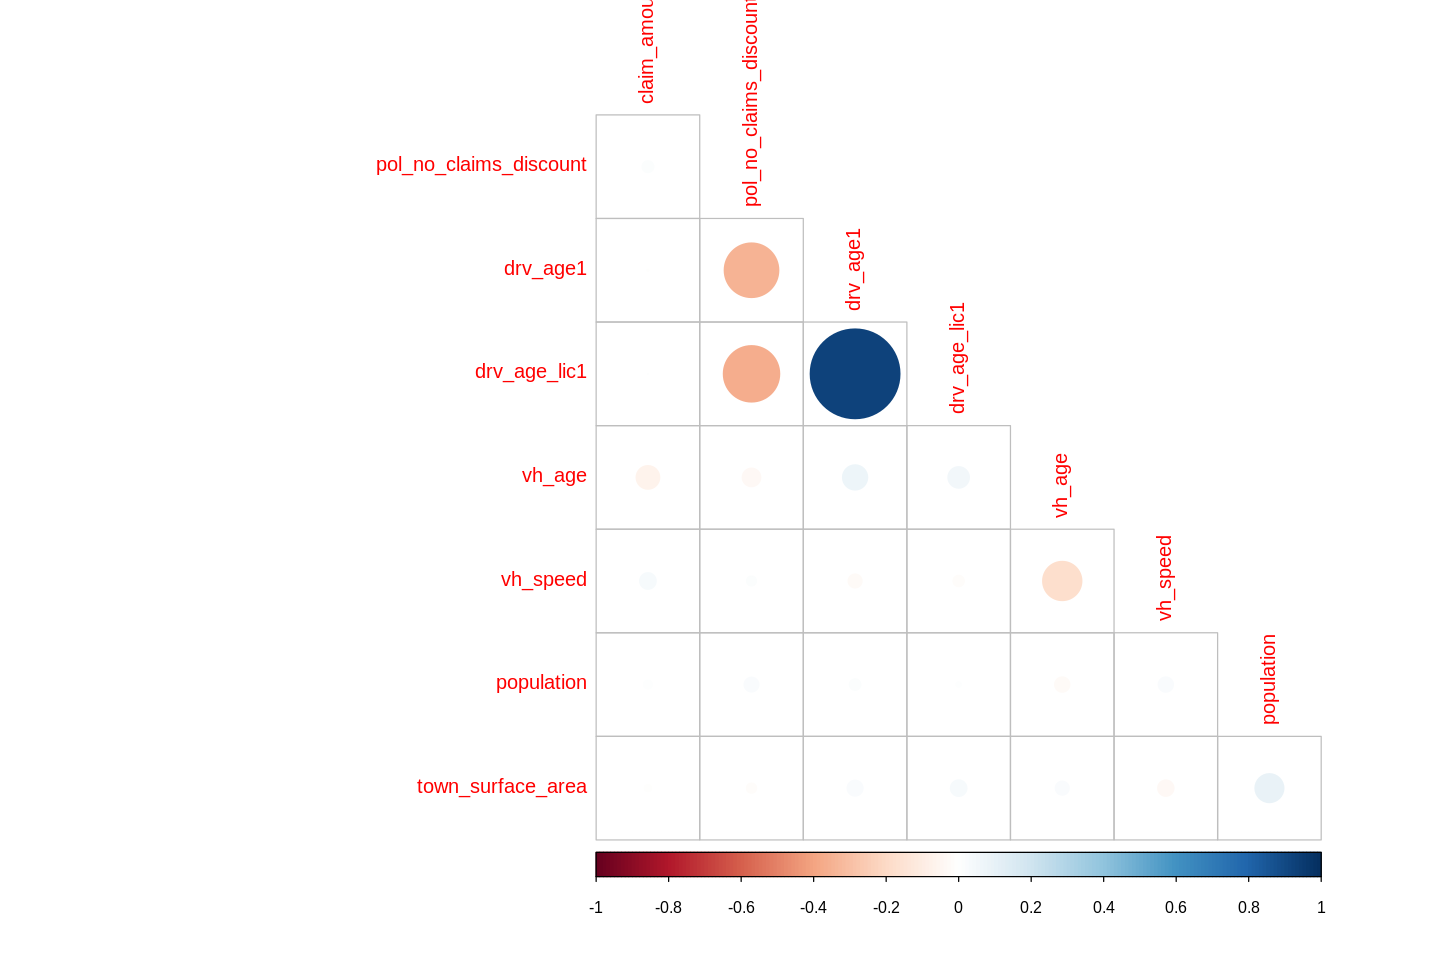

In [52]:
options(repr.plot.width=12, repr.plot.height=8)
corrplot(cor(db[,con_features], use="complete.obs"), method = "circle",type="lower",diag=FALSE) 

In [53]:
cuts_vh_age = quantile(db$vh_age,seq(0, 1, 0.25))
  db$vh_age_factor = cut(db$vh_age, breaks=cuts_vh_age)

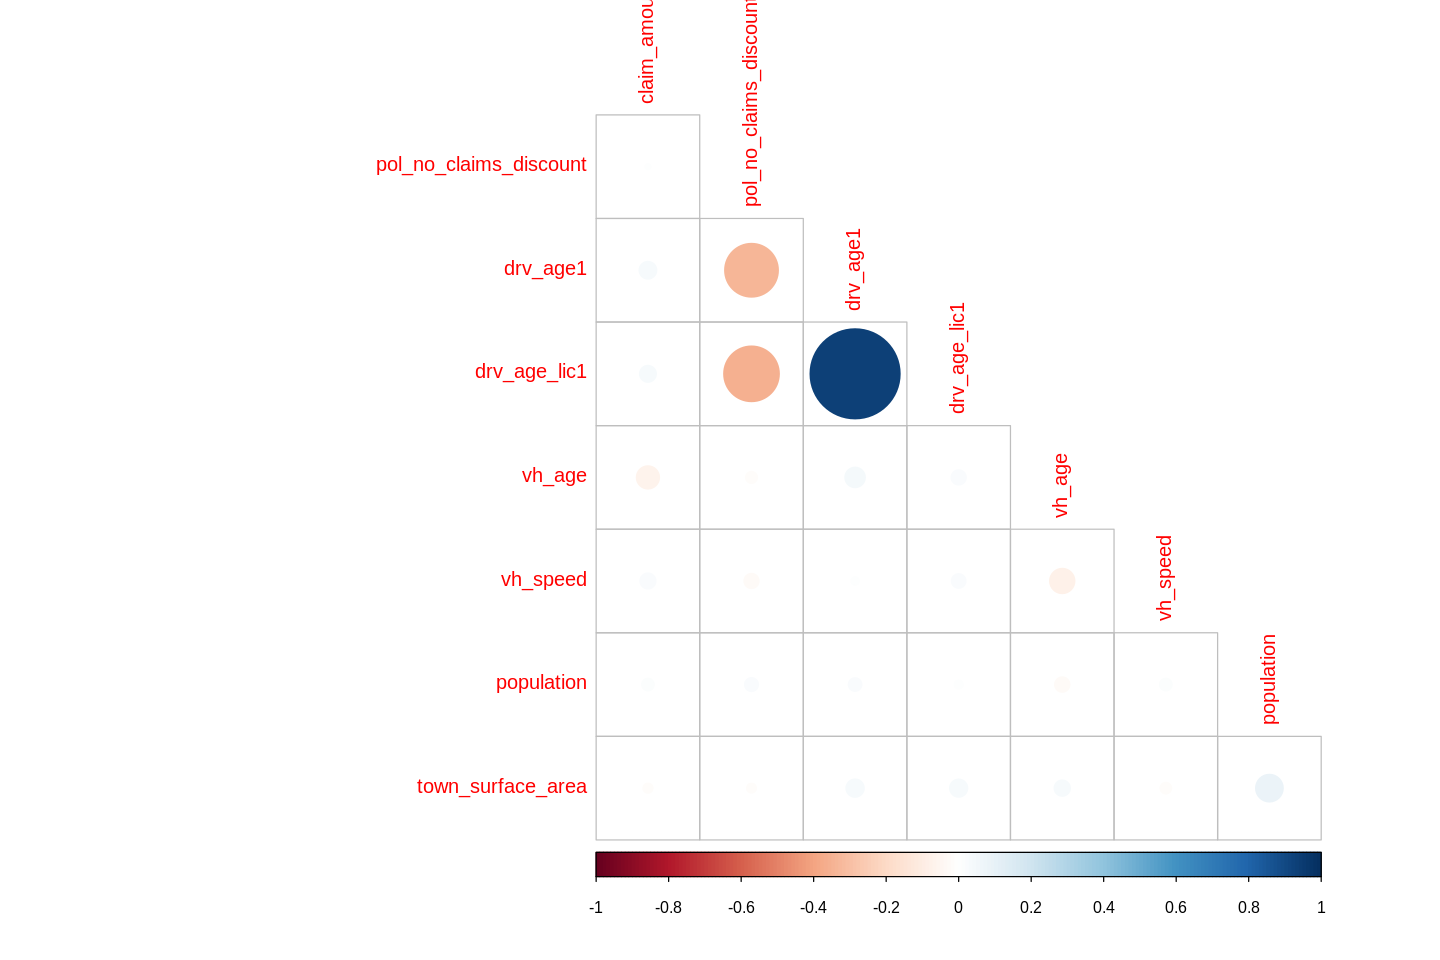

In [54]:
options(repr.plot.width=12, repr.plot.height=8)
corrplot(cor(db[db$claim_amount>0,con_features], use="complete.obs"), method = "circle",type="lower",diag=FALSE) 

In [55]:
features_to_drop <-c('drv_age_lic1','vh_weight','vh_value')

## Response Variable

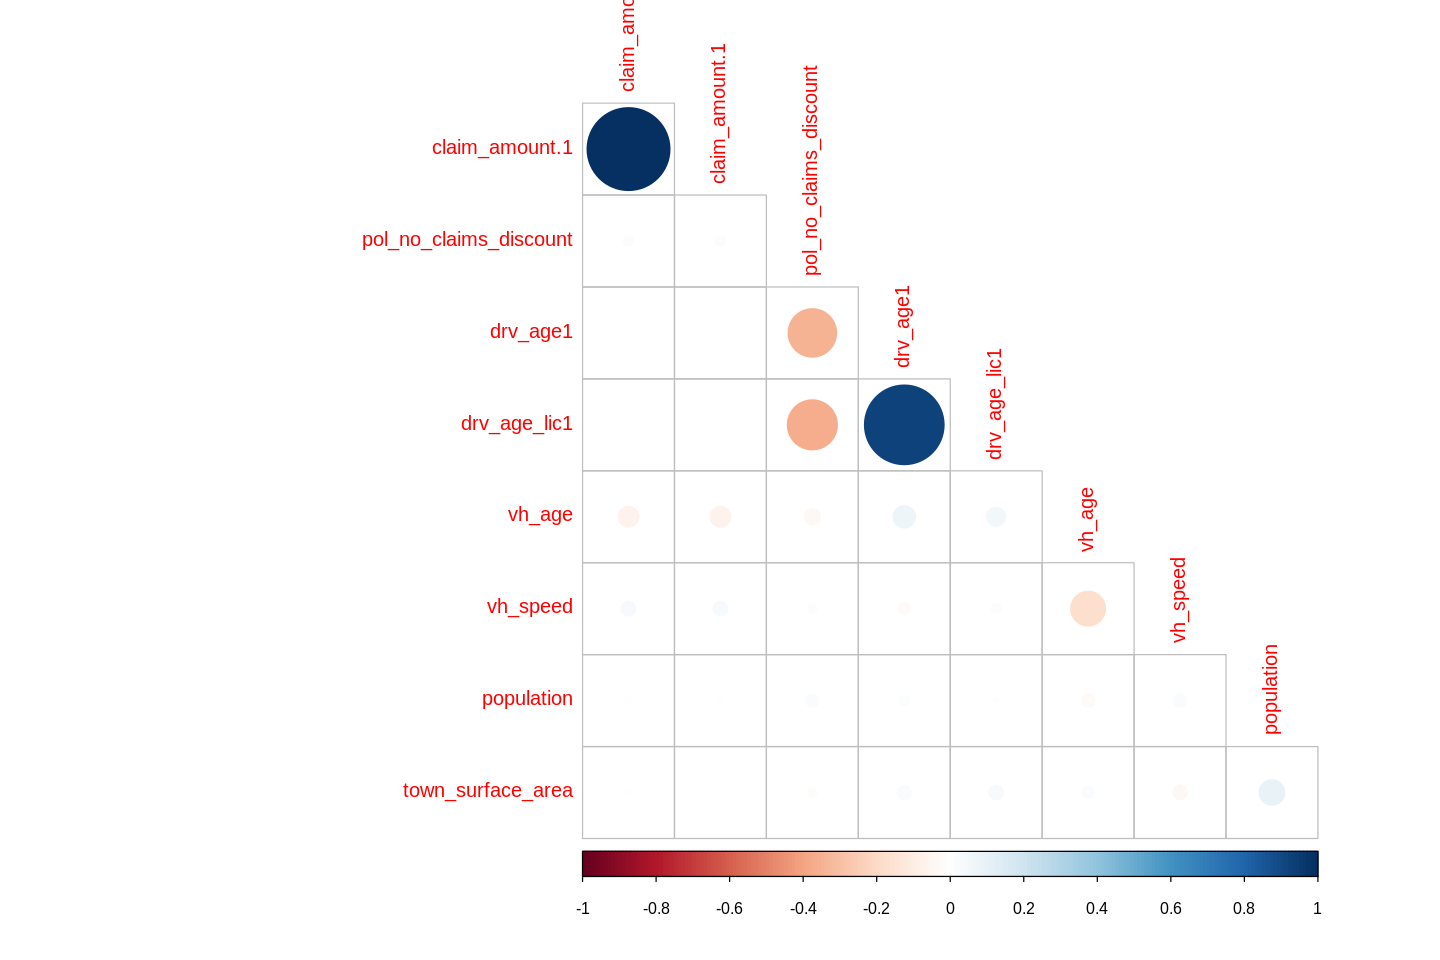

In [56]:
options(repr.plot.width=12, repr.plot.height=8)
corrplot(cor(db[,c('claim_amount',con_features)], use="complete.obs"), method = "circle",type="lower",diag=FALSE) 

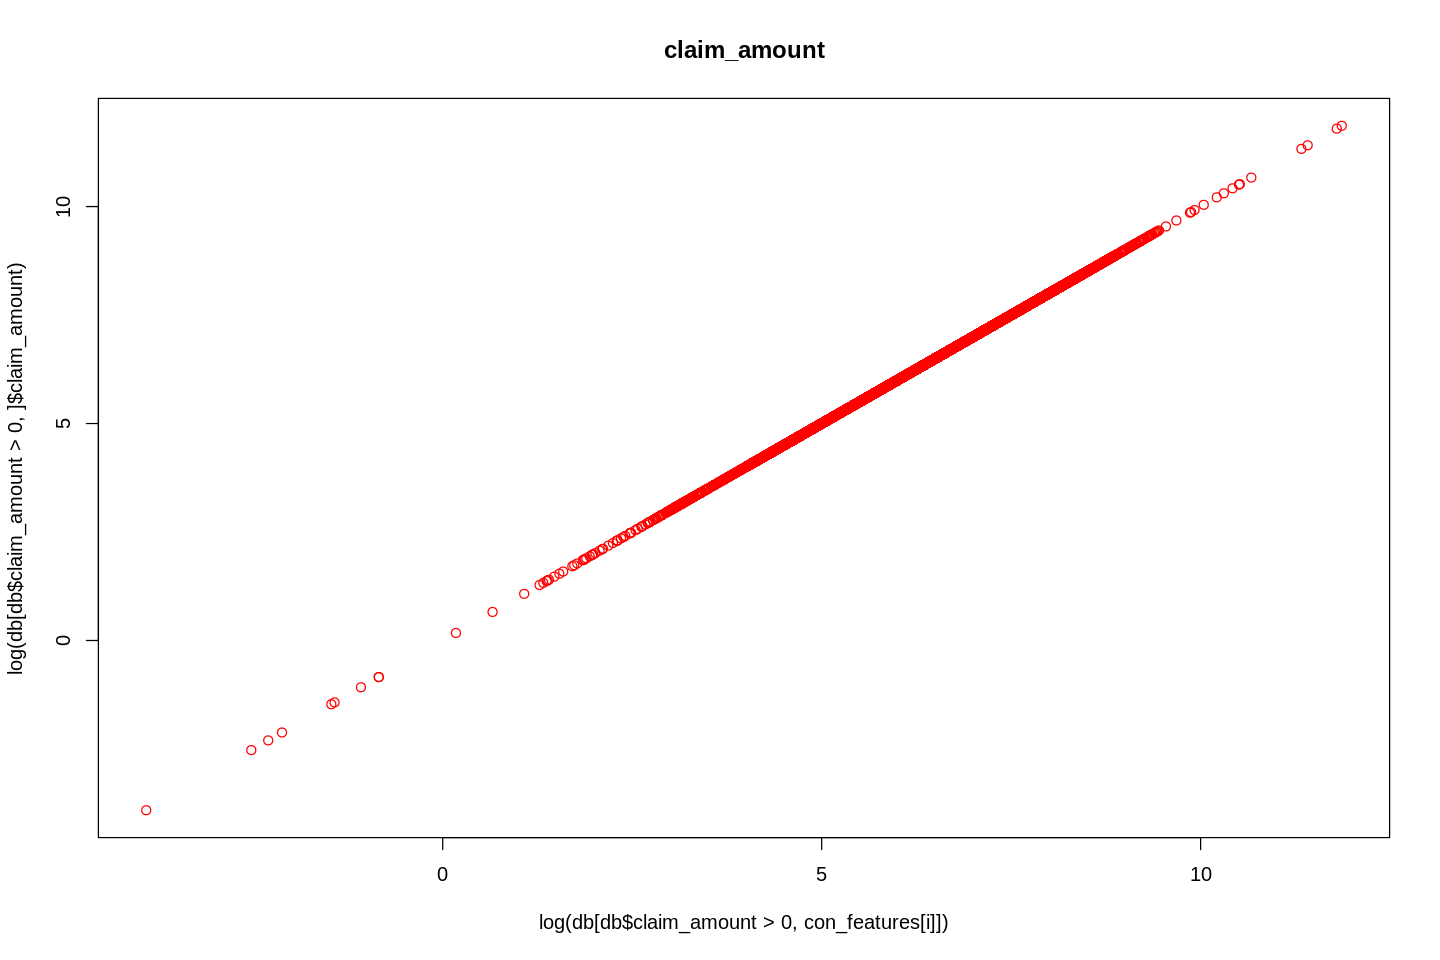

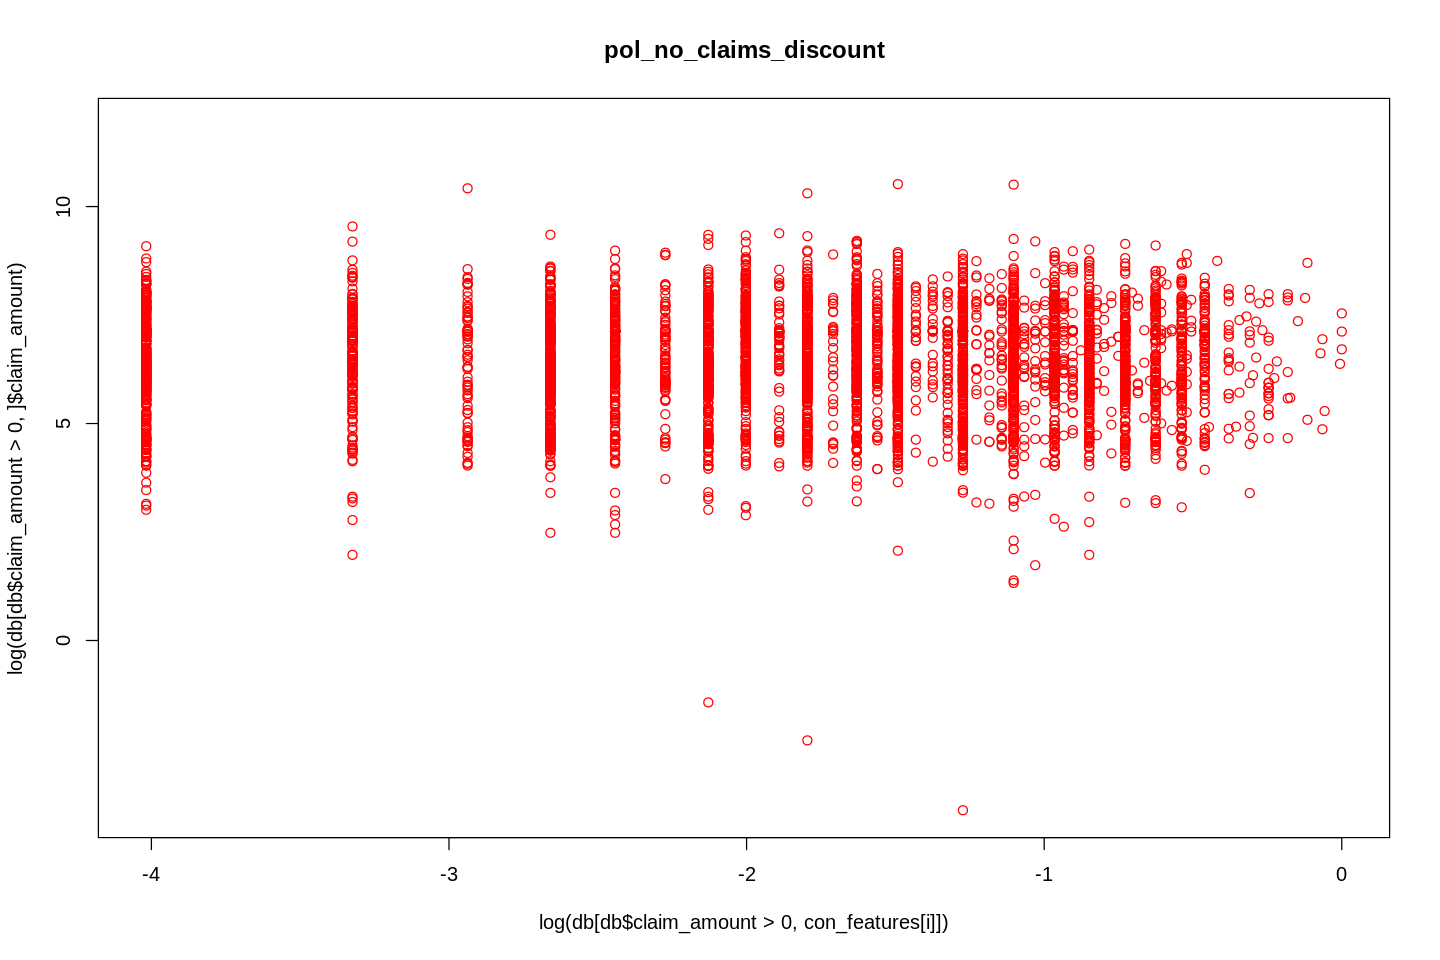

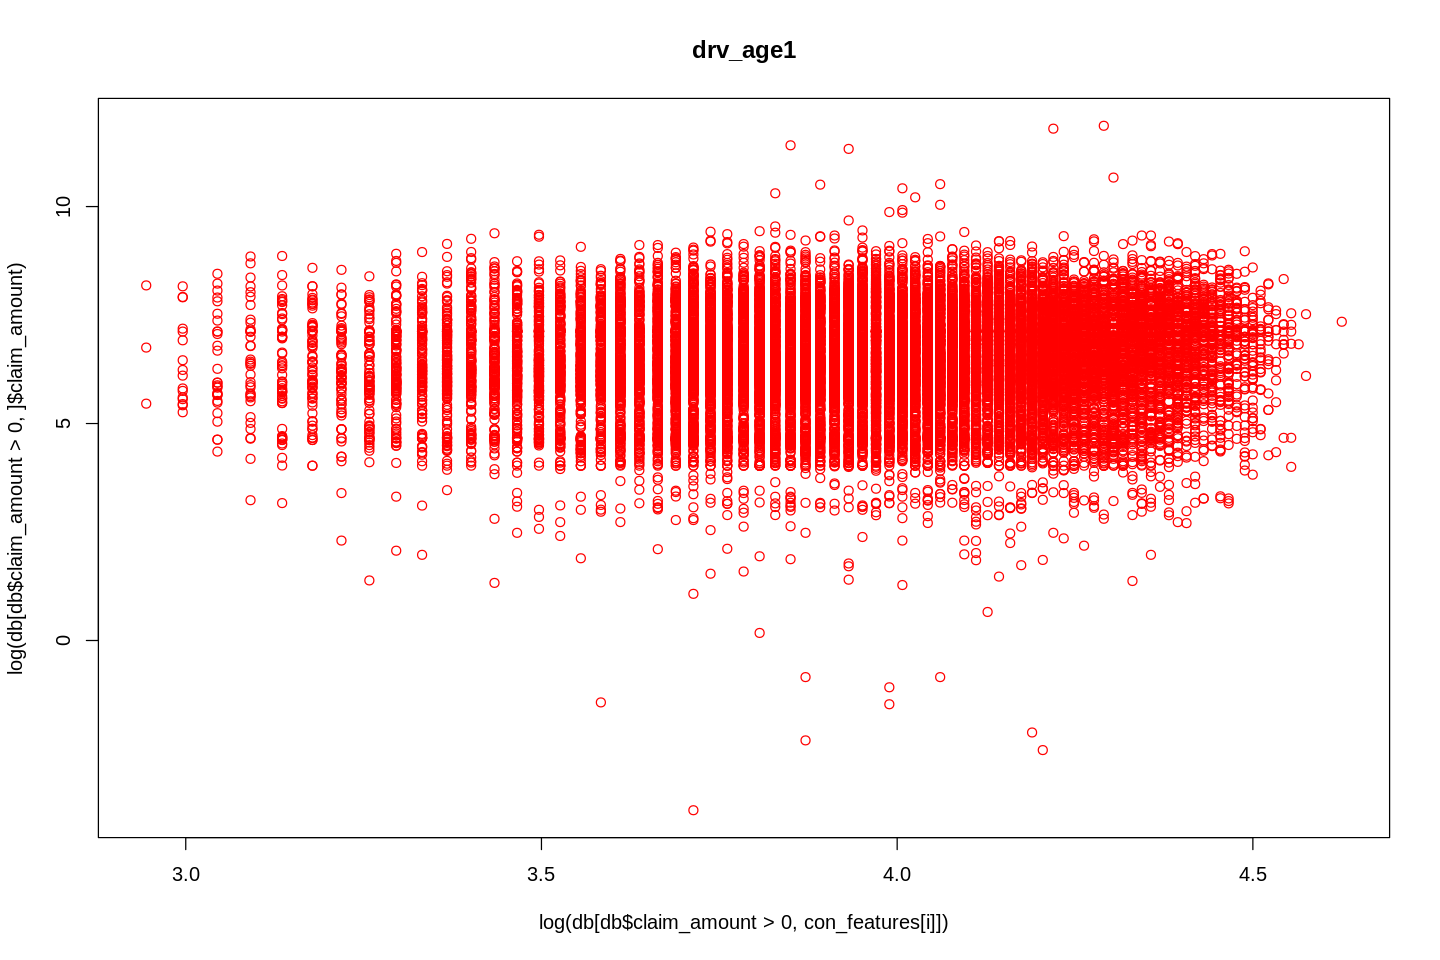

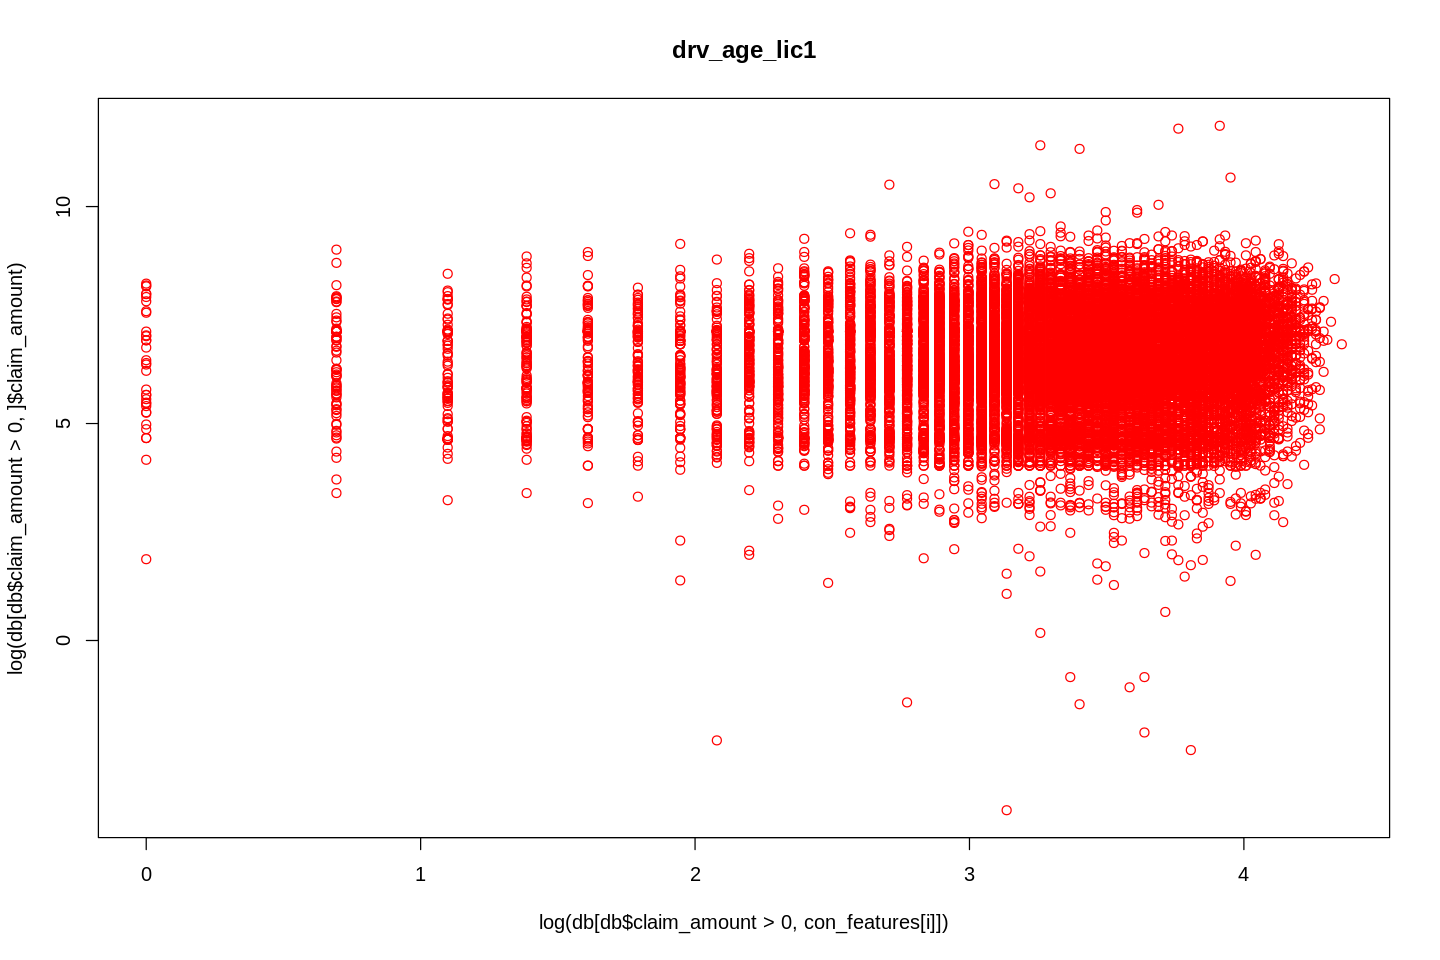

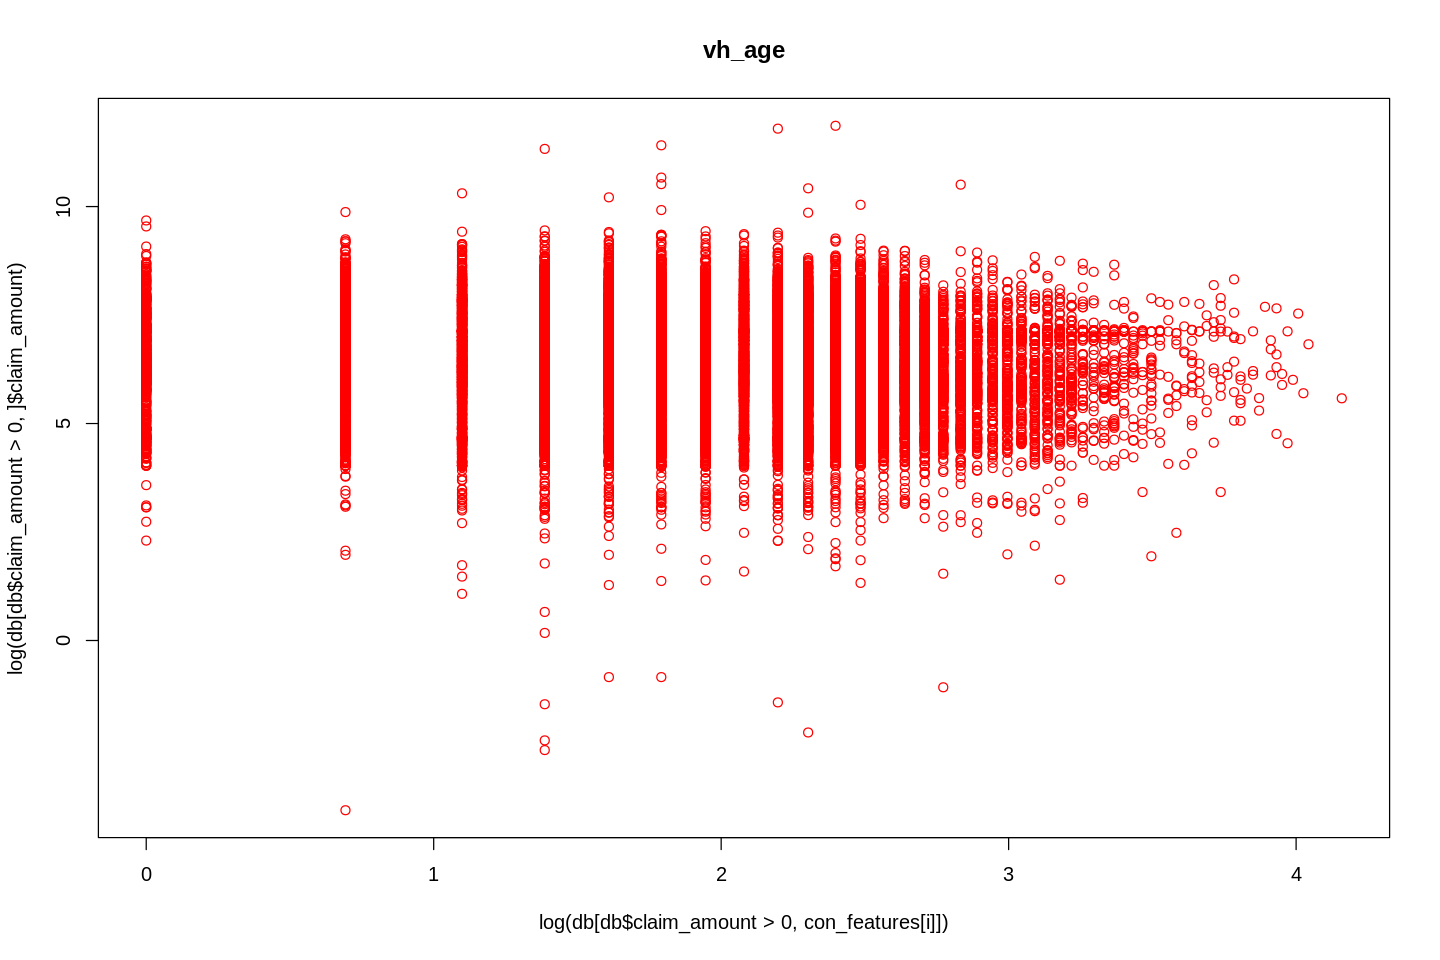

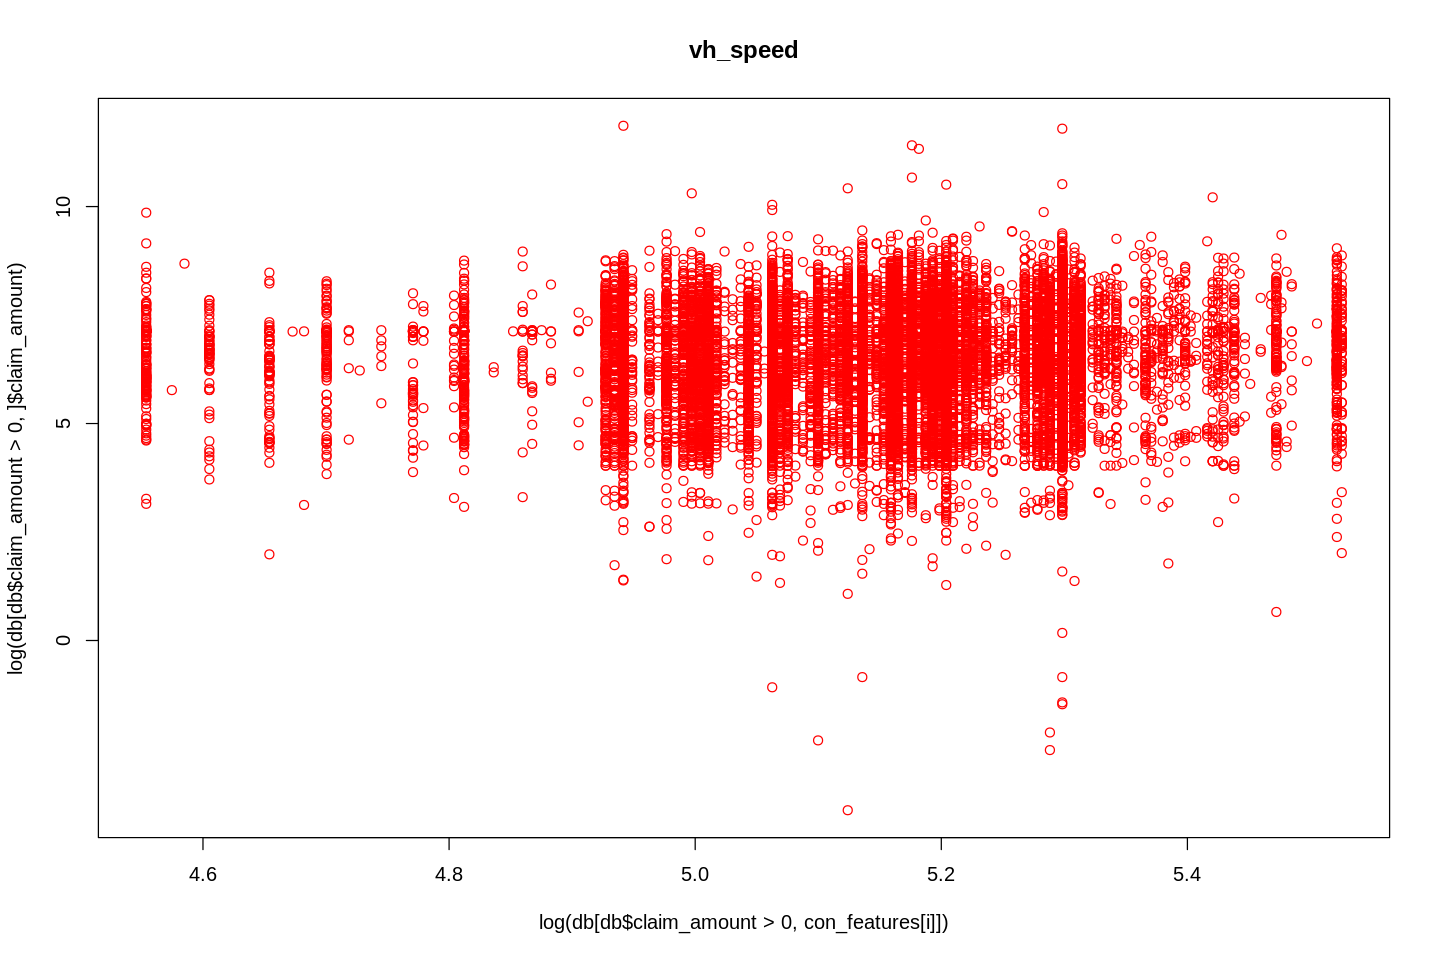

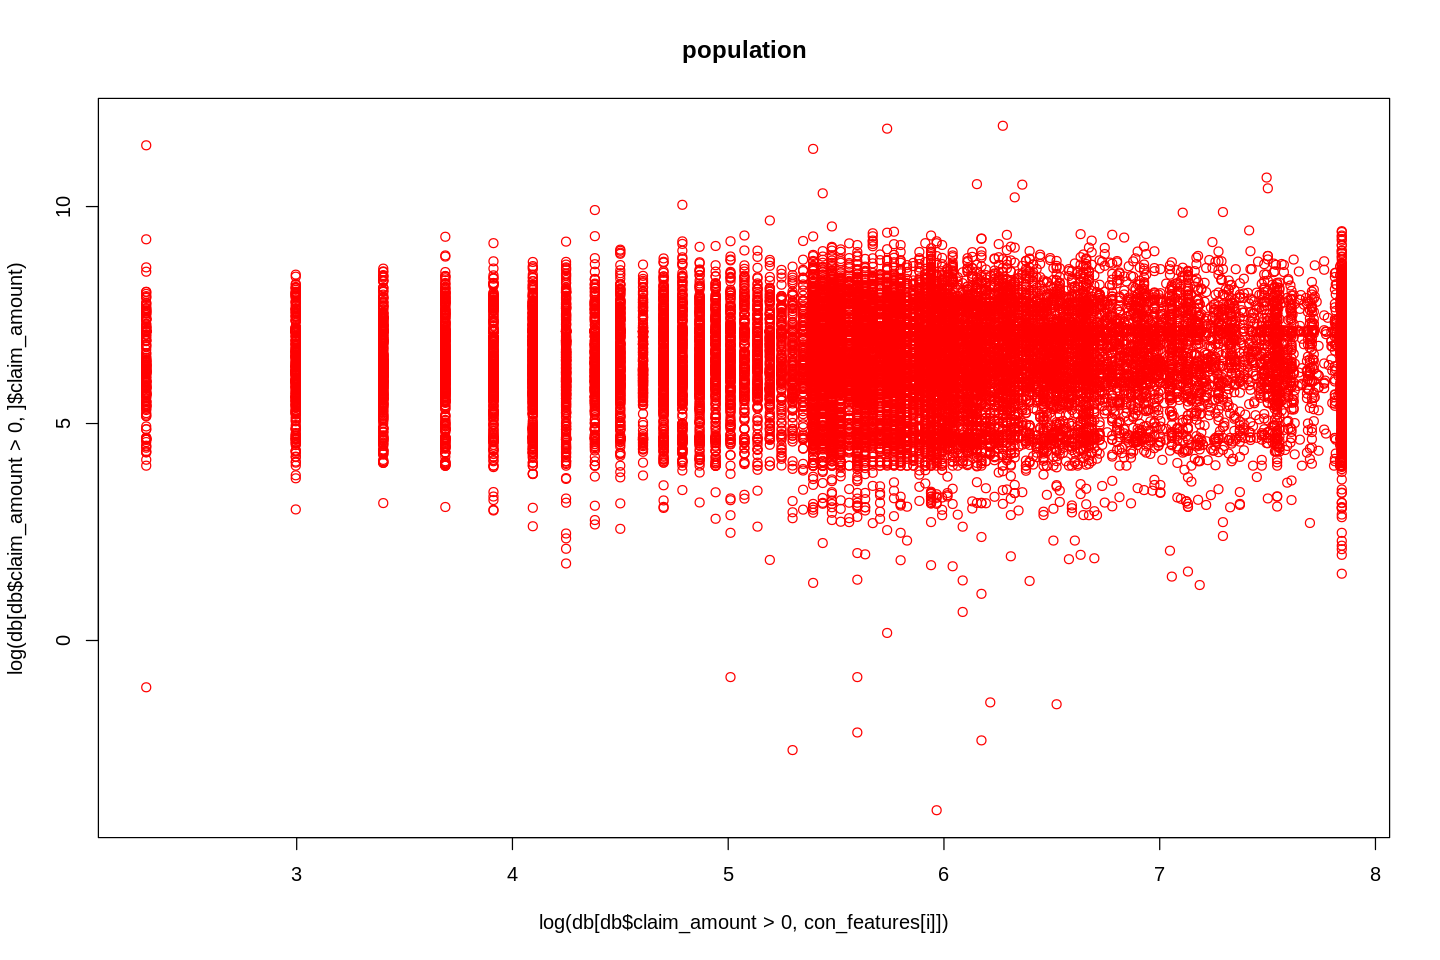

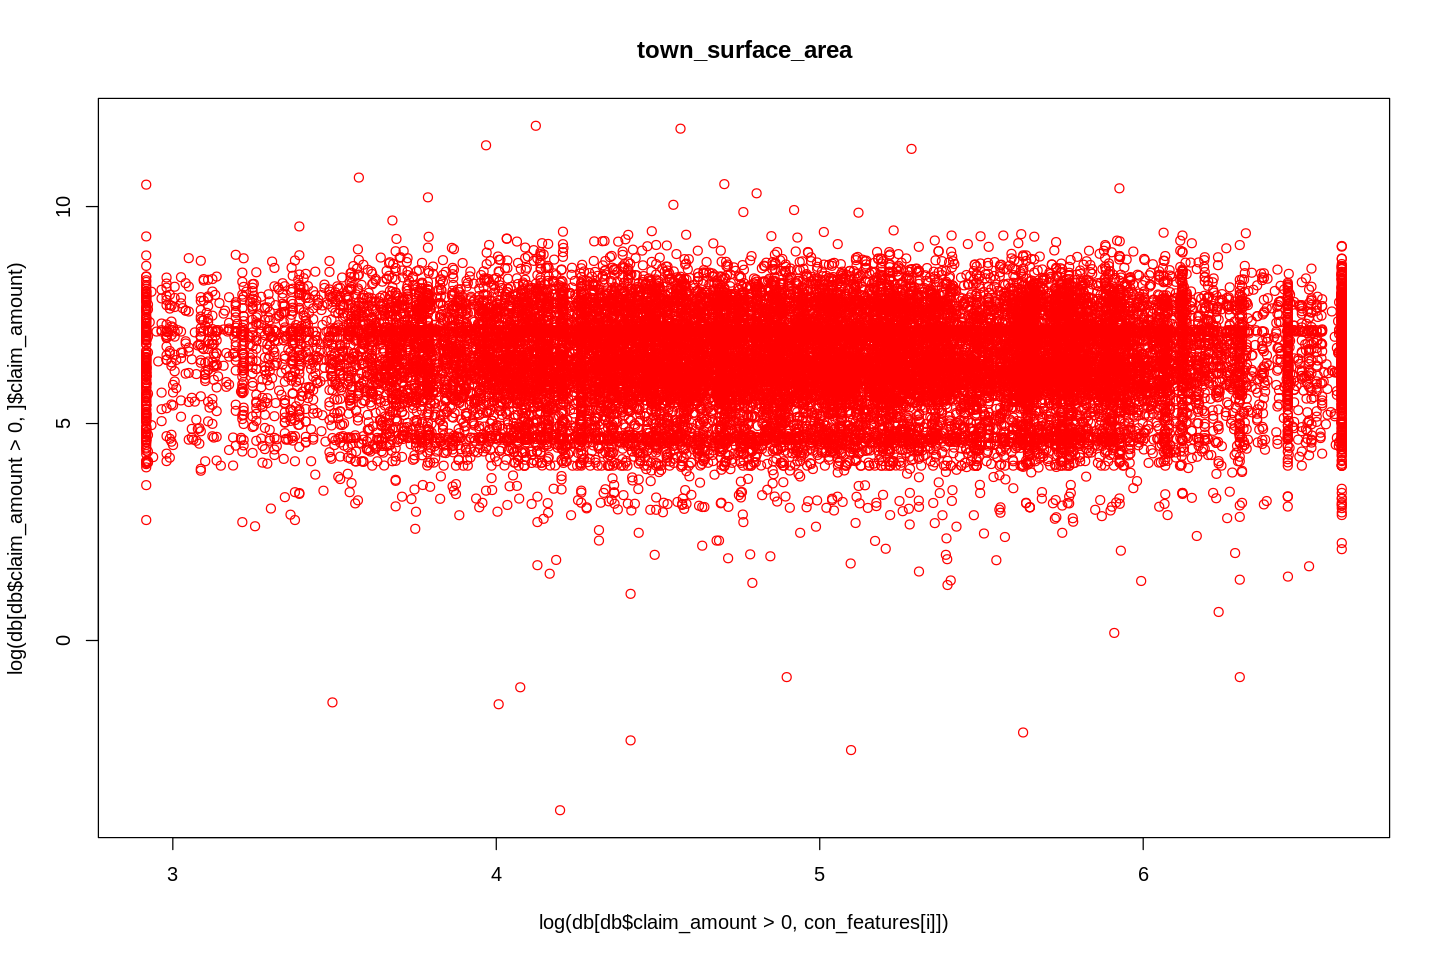

In [57]:
for(i in 1:length(con_features))
{
  plot(x=log(db[db$claim_amount>0,con_features[i]]),y=log(db[db$claim_amount>0,]$claim_amount),main = con_features[i],col = 'red')
}

In [58]:
db$claims_or_not

NULL

In [59]:
summary(db$claim_amount[db$claim_amount>0])

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
     0.02    324.29    690.53   1118.75   1288.79 141828.26 

In [60]:
summary(log(db$claim_amount[db$claim_amount>0]))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -3.912   5.782   6.537   6.453   7.161  11.862 

We are going to work with logarithme

In [61]:
round(table(db$claim_amount>0)/nrow(db),3)


FALSE  TRUE 
0.898 0.102 

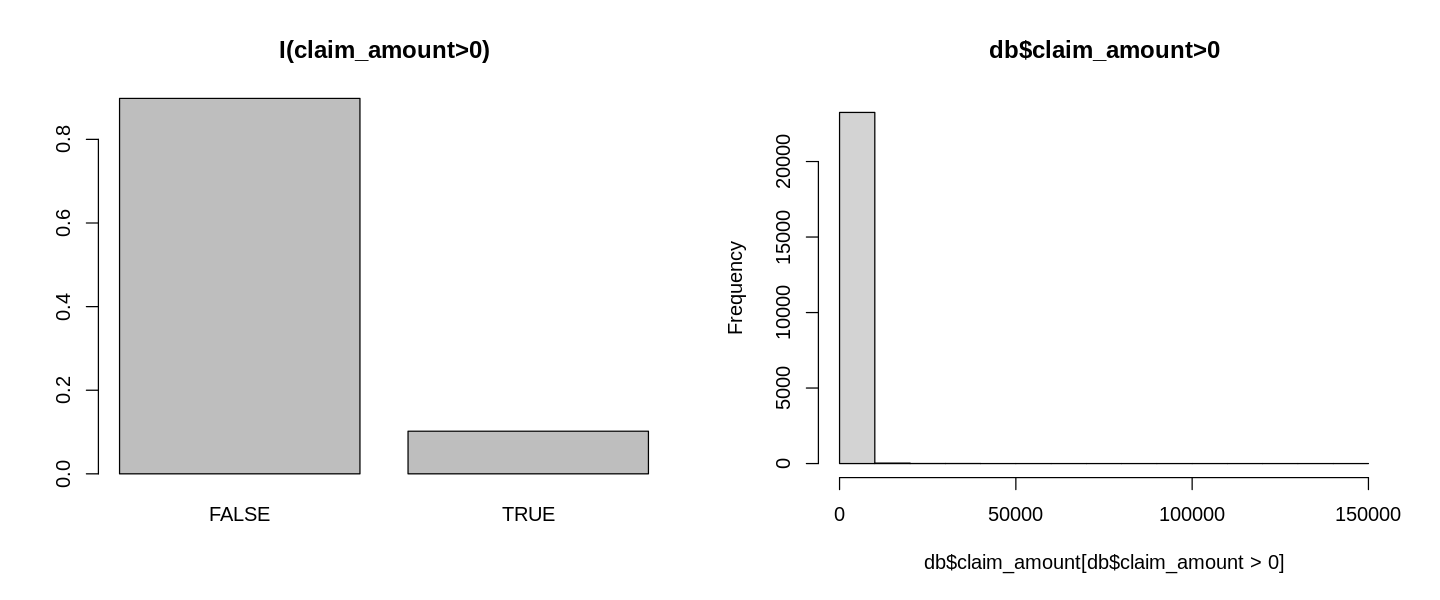

In [62]:
options(repr.plot.width=12, repr.plot.height=5)
par(mfrow=c(1,2))             
barplot(round(table(db$claim_amount>0)/nrow(db),3),main="I(claim_amount>0)")
hist(db$claim_amount[db$claim_amount>0],main="db$claim_amount>0")

In [63]:
db <- db %>% mutate(claims_or_not = as.numeric(db$claim_amount>0))

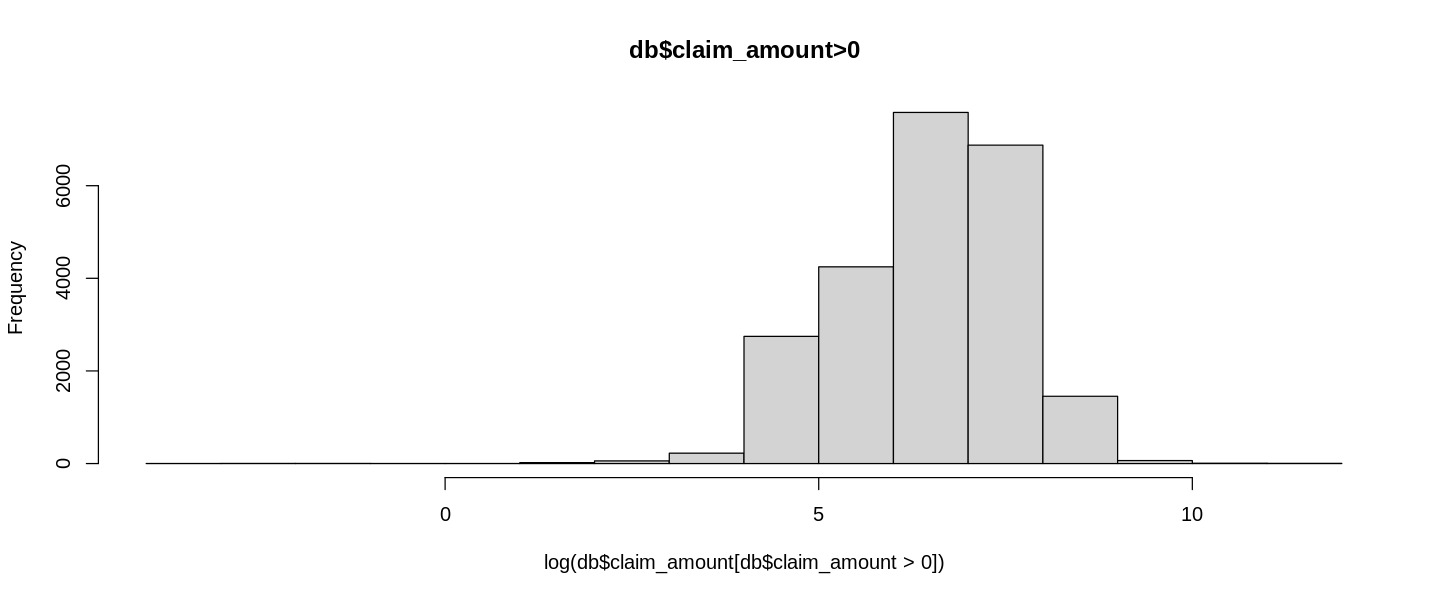

In [64]:
options(repr.plot.width=12, repr.plot.height=5)
hist(log(db$claim_amount[db$claim_amount>0]),main="db$claim_amount>0")

In [65]:
threshold = 10000
indice <- which(db$claim_amount<=threshold)
b<- db$claim_amount[-indice]
length(b)
(length(b)/sum(db$claim_amount>0))*100

[1] 41

[1] 0.1760261

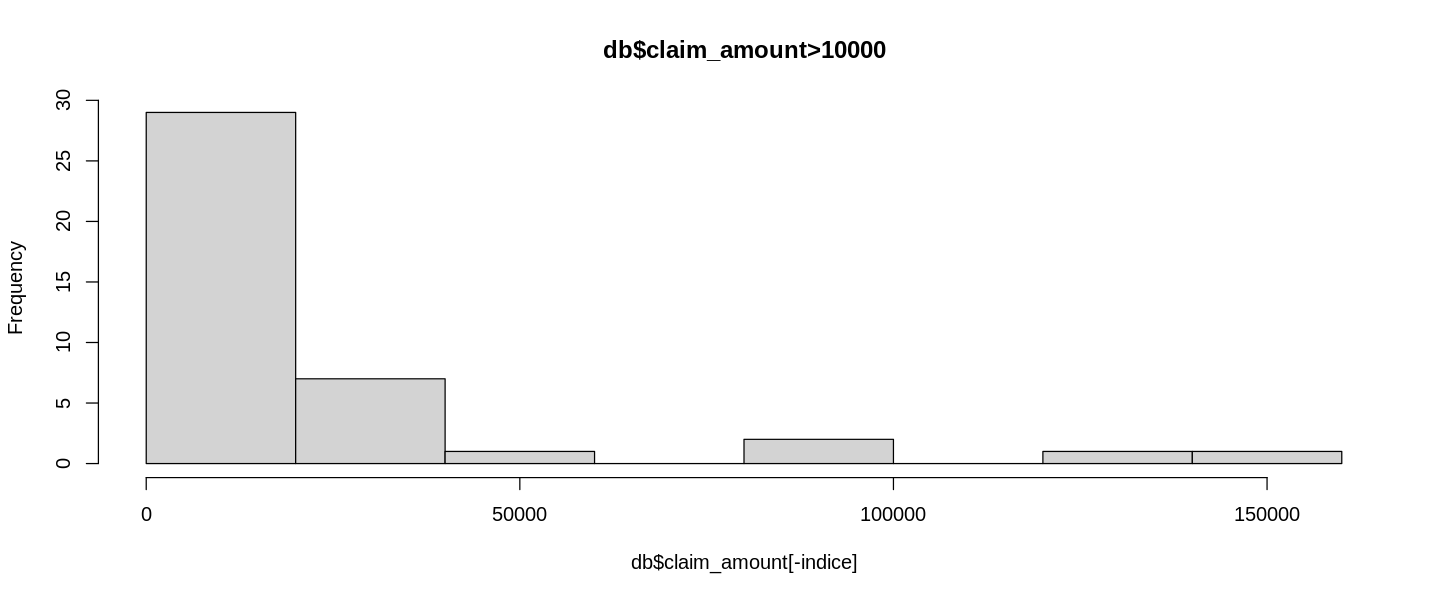

In [66]:
options(repr.plot.width=12, repr.plot.height=5)
hist(db$claim_amount[-indice],main="db$claim_amount>10000")

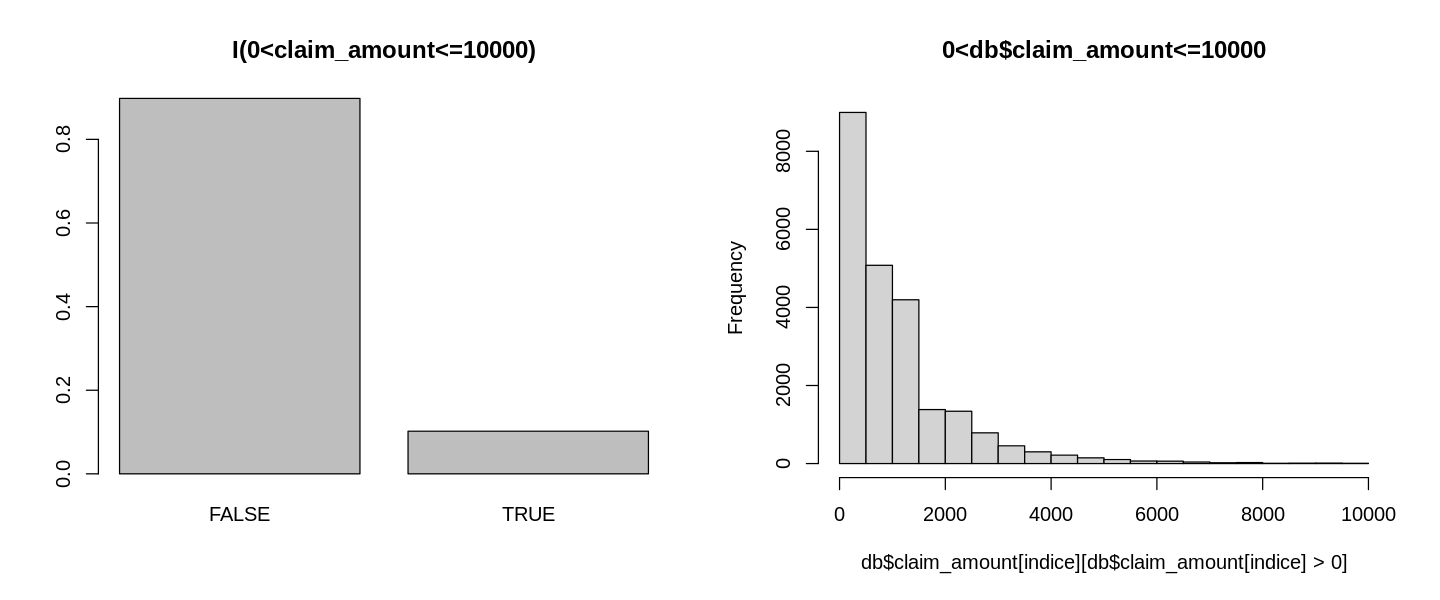

In [67]:
options(repr.plot.width=12, repr.plot.height=5)
par(mfrow=c(1,2))             
barplot(round(table(db$claim_amount[indice]>0)/length(db$claim_amount[indice]),3),main="I(0<claim_amount<=10000)")
hist(db$claim_amount[indice][db$claim_amount[indice]>0],main="0<db$claim_amount<=10000")

## Univariate Analysis

In [68]:
zero_claims <- db$claim_amount==0

In [69]:
saveRDS(db, file = "training.rds")

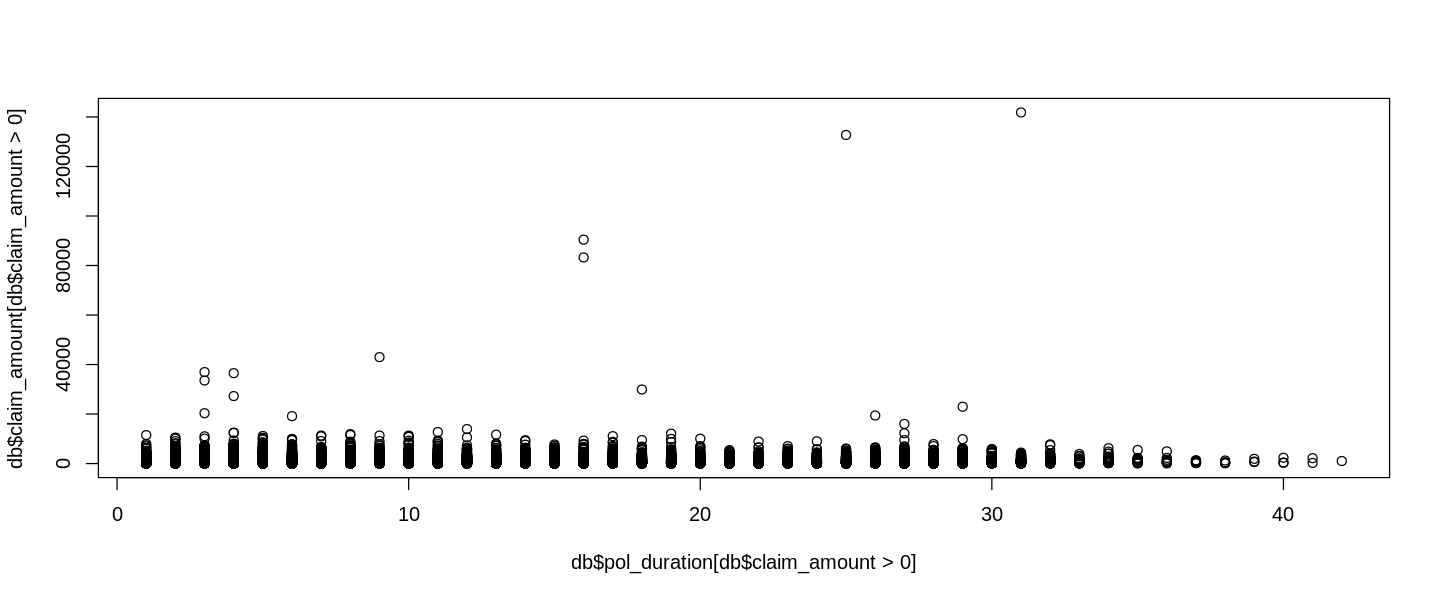

In [70]:
plot(db$pol_duration[db$claim_amount>0],db$claim_amount[db$claim_amount>0])